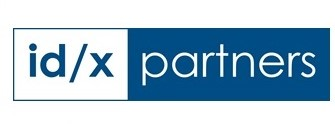

# <center>**LOAN CREDIT RISK PREDICTION💼📊**</center>

---
<h2><center>Author: Bintang Phylosophie</center></h2>


# Dataset & Business Understanding

## Dataset Information
This dataset contains loan information from a lending company namely [LendingClub](https://www.lendingclub.com/) from 2007 to 2014.

## Attribute Information

### Project Overview
id/x partners is a private high growth organization headquartered in Jakarta and is a leading consulting firm for Data, Analytics & Decisioning solution in Asia-Pacific region. I am involved in a project from a lending company (multifinance), where the client wants to improve the accuracy of assessing and managing credit risk, so that they can optimize their business decisions and reduce potential losses. This can be done by developing a machine learning model that can predict credit risk based on the provided dataset, which includes data on approved and rejected loans.

### Identifier
`id` and `member_id`is unique ID that each of which is an ID for loan listing and ID for the loaner member

### Target
`loan_status` has several values, such as:
   * `Current` means current payments
   * `Charged Off` means the payment is in default so that it is written off
   * `Late` means late payment is made
   * `In Grace Period` means in grace period
   * `Fully Paid` means payment in full
   * `Default` means payment is stuck

<br>
Later loan_status will be categorized as good loaner and bad loaner.

### Company Goals
* Accepting applicants who will be good loaner
* Declining applicants who will be a risky borrower or bad loaner

### Problems
Loan companies are faced with two major decisions that carry two types of risk regarding approval decisions:
1. Approving loans to applicants who are unlikely to repay their loans resulting in financial losses for the company 
2. Disapproving loans to applicants who are likely to repay the loan resulting in business losses

### Objectives
1. Predict whether the applicant is a good loaner or a bad loaner
2. Whats makes the borrower indicated a bad loaner

# Import Library

In [227]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 
import math
import matplotlib.pyplot as plt
from datetime import datetime
from wordcloud import WordCloud
import plotly.express as px

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

#Scaling 
from sklearn.preprocessing import StandardScaler, RobustScaler

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE, ADASYN

# Model
from sklearn.metrics import accuracy_score, f1_score, auc, roc_curve, roc_auc_score, recall_score, precision_score, confusion_matrix
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
import time
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier, plot_importance



# Load Dataset

Firstly I start with basic data analysis. Lets look at features of data.

In [228]:
url = "https://rakamin-lms.s3.ap-southeast-1.amazonaws.com/vix-assets/idx-partners/loan_data_2007_2014.csv"
data = pd.read_csv(url)


# Data Understanding

In [229]:
data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are 3 things that take my attention 
1) There is Unnamed: 0, id, member_id that cannot be used for modelling 
2) loan_status is our class label 
3) There are so many null values in each features.
<br><br>
Therefore, drop these unnecessary features and check total of data that contains null values in the next steps. However do not forget this is not a feature selection. 

In [230]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [231]:
print("shape of the data:", data.shape)

shape of the data: (466285, 75)


In [232]:
print(data.columns)

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verificatio

In [233]:
# pengecekan keseluruhan dataframe
def percent_null(series):
    total_nulls = (series.isnull() | (series == ' ')).sum()

    percent = (total_nulls / len(series)) * 100

    if percent == 0:
        return '0'
    else:
        return f'{percent:.2f}'

summary_data = []

for col in data.columns:
    column_summary = {
        'Column Name': col,
        '%null': str(percent_null(data[col]))+"%",
        'dtype': data[col].dtype,
        'count': data[col].count(),
        'nunique': data[col].nunique(),
        'mode': data[col].mode().values if not data[col].mode().empty else None,
        'unique value': list(data[col].value_counts().to_dict().keys())
    }
    summary_data.append(column_summary)
pd.DataFrame(summary_data)


,Column Name,%null,dtype,count,nunique,mode,unique value
0,Unnamed: 0,0%,int64,466285,466285,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0, 310839, 310865, 310864, 310863, 310862, 31..."
1,id,0%,int64,466285,466285,"[54734, 55521, 55742, 56413, 57167, 57245, 574...","[1077501, 26180404, 26219322, 26239577, 262905..."
2,member_id,0%,int64,466285,466285,"[70473, 70626, 70651, 70681, 70694, 70699, 707...","[1296599, 28653081, 28692177, 28702376, 287632..."
3,loan_amnt,0%,int64,466285,1352,[10000],"[10000, 12000, 15000, 20000, 35000, 8000, 6000..."
4,funded_amnt,0%,int64,466285,1354,[10000],"[10000, 12000, 15000, 20000, 35000, 8000, 6000..."
...,...,...,...,...,...,...,...
70,all_util,100.00%,float64,0,0,None,[]
71,total_rev_hi_lim,15.07%,float64,396009,14612,[15000.0],"[15000.0, 13500.0, 10000.0, 12000.0, 12500.0, ..."
72,inq_fi,100.00%,float64,0,0,None,[]
73,total_cu_tl,100.00%,float64,0,0,None,[]


In [234]:
data.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


# Feature Engineering

## Drop Unnecessary columns

In [235]:
cols_to_drop=[
    # unique id
    "Unnamed: 0",
    

    # free text
    "url",
    "desc",

    # all null / constant / others
    "zip_code",
    "annual_inc_joint",
    "dti_joint",
    "verification_status_joint",
    "open_acc_6m",
    "open_il_6m",
    "open_il_12m",
    "open_il_24m",
    "mths_since_rcnt_il",
    "total_bal_il",
    "il_util",
    "open_rv_12m",
    "open_rv_24m",
    "max_bal_bc",
    "all_util",
    "inq_fi",
    "total_cu_tl",
    "inq_last_12m",
    "mths_since_last_major_derog",
    "tot_coll_amt",
    "tot_cur_bal",
    "total_rev_hi_lim",
    
    #expert Judgment
    "sub_grade"
    ]

In [236]:
data.drop(cols_to_drop, axis=1, inplace=True)

## Defining Target Variable

Calculate the percentage distribution of values ​​in the column `loan_status` to get the proportion of values ​​in percentage form.

In [237]:

persentase_loan_status = data.loan_status.value_counts(normalize=True) * 100
# Displays the percentage distribution of values ​​in the 'loan_status' column
print(persentase_loan_status)

loan_status
Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: proportion, dtype: float64


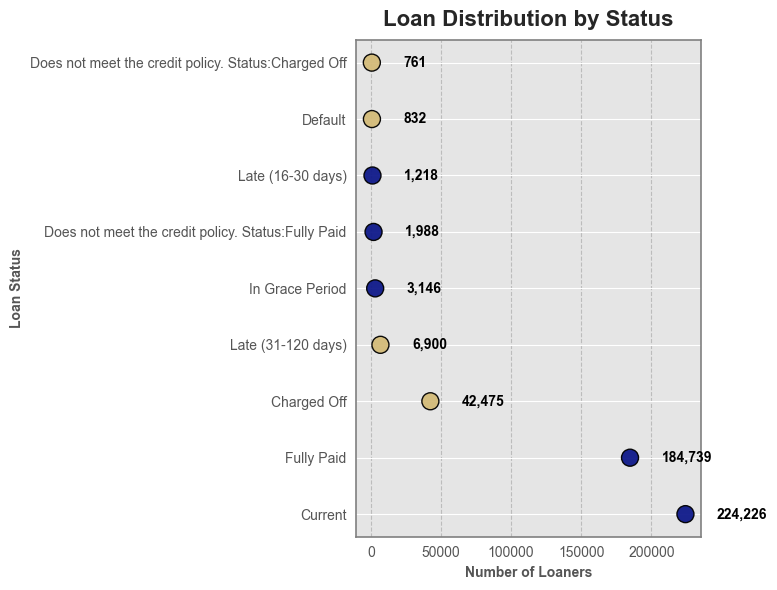

In [238]:
# Group by loan_status: count and mean loan amount
grouped = data.groupby('loan_status')['loan_amnt'].agg(['count', 'mean']).reset_index()

# Assign consistent colors
status_colors = {
    'Current': '#0f198a',
    'Fully Paid': '#0f198a',
    'Does not meet the credit policy. Status:Fully Paid': '#0f198a',
    'Charged Off': '#d4bb79',
    'Late (31-120 days)': '#d4bb79',
    'In Grace Period': '#0f198a',
    'Late (16-30 days)': '#0f198a',
    'Default': '#d4bb79',
    'Does not meet the credit policy. Status:Charged Off': '#d4bb79'
}
grouped['color'] = grouped['loan_status'].map(status_colors)

# Sort by count in descending order
grouped = grouped.sort_values('count', ascending=False)
grouped['loan_status'] = pd.Categorical(grouped['loan_status'], categories=grouped['loan_status'], ordered=True)

# Plot setup
fig, ax = plt.subplots(figsize=(8, 6))
dot_size = 150

# Scatter plot with borders
ax.scatter(
    grouped['count'],
    grouped['loan_status'],
    s=dot_size,
    color=grouped['color'],
    edgecolors='black',
    linewidths=1,
    alpha=0.95
)

# Add count labels
max_count = grouped['count'].max()
label_offset = max_count * 0.1  # Dynamically set the label offset (10% of max count)

for _, row in grouped.iterrows():
    ax.text(row['count'] + label_offset, row['loan_status'], f"{int(row['count']):,}",
            va='center', ha='left', fontsize=10, color='black', fontweight='bold')

# Title and labels
ax.set_title("Loan Distribution by Status", fontsize=16, fontweight='bold', pad=10)
ax.set_xlabel("Number of Loaners", fontsize=10, fontweight='bold')
ax.set_ylabel("Loan Status", fontsize=10, fontweight='bold')

# Grid and border styling
ax.grid(axis='x', linestyle='--', color='gray', alpha=0.4)
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.2)
    spine.set_edgecolor('gray')

plt.tight_layout()
plt.show()


In [239]:
# List of payment statuses that are considered 'bad_status'
bad_status = [ 
    "Charged Off",
    "Default",
    "Does not meet the credit policy. Status:Charged Off",
    "Late (31-120 days)" ]
# Added a 'bad_flag' column that flags whether the payment status falls under "bad_status'
data['loan_status_new'] = np.where(
    data['loan_status'].isin(bad_status),
    'bad_loan',
    'good_loan'
)

In [240]:
# Calculate the percentage distribution of values ​​in the 'bad_flag' column
persentase_bad_flag = data['loan_status_new'].value_counts(normalize=True) * 100
# Displays the percentage distribution of values ​​in the 'bad_flag* column
print (persentase_bad_flag)

loan_status_new
good_loan    89.069346
bad_loan     10.930654
Name: proportion, dtype: float64


In [241]:
# Remove original column "loan_status"
data.drop("loan_status", axis=1, inplace=True)

In [242]:
data.rename(columns={'loan_status_new': 'loan_status'}, inplace=True)

## Data Cleaning

### Column: `emp_length`

In [243]:
# Get unique values ​​from column "emp_length"
data['emp_length']. unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [244]:
# Remove extra text and change data type to float
data['emp_length_int'] = (
    data['emp_length']
    .str.replace(r'[^0-9]+', '', regex=True)
    .replace('', '0')
    .astype(float)
)


In [245]:
# Delete original column "emp length"
data.drop('emp_length', axis=1, inplace=True)

### Column: `term`

In [246]:
# Displays unique values ​​from the column "term*
unique_terms = data['term'].unique()
print (unique_terms)

[' 36 months' ' 60 months']


In [247]:
# Remove extra text and change data type to float
data['term_int'] = data['term'].str.replace(' months', '').astype(float)

### Column: `earliest_cr_line`

In [248]:
# Display the first three rows in 'earliest_cr_line_column'
print(data['earliest_cr_line'].head(3))

0    Jan-85
1    Apr-99
2    Nov-01
Name: earliest_cr_line, dtype: object


In [249]:
# Convert 'earliest_cr_line' to date format
data['earliest_cr_line_date'] = pd.to_datetime(data['earliest_cr_line'], format= '%b-%y')
print(data['earliest_cr_line_date'].head(3))

0   1985-01-01
1   1999-04-01
2   2001-11-01
Name: earliest_cr_line_date, dtype: datetime64[ns]


In [250]:
# Calculate the number of months from 'earliest_cr_line_date' to the reference date
reference_date = pd.to_datetime('2017-12-01')
data['mths_since_earliest_cr_line'] = (
    (reference_date.year - data['earliest_cr_line_date'].dt.year) * 12 +
    (reference_date.month - data['earliest_cr_line_date'].dt.month)
)

# Preview the result
print(data['mths_since_earliest_cr_line'].head(3))


0    395.0
1    224.0
2    193.0
Name: mths_since_earliest_cr_line, dtype: float64


In [251]:
# Display descriptive statistics for column 'mths_since_earliest_cr_line'
print(data['mths_since_earliest_cr_line'].describe())

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64


In [252]:
# Display lines with 'mths_since_earliest_cr_line' value less than 0
print(data[data['mths_since_earliest_cr_line'] < 0][['earliest_cr_line', 'earliest_cr_line_date', 'earliest_cr_line', 'earliest_cr_line_date']].head(3))

     earliest_cr_line earliest_cr_line_date earliest_cr_line  \
1580           Sep-62            2062-09-01           Sep-62   
1770           Sep-68            2068-09-01           Sep-68   
2799           Sep-64            2064-09-01           Sep-64   

     earliest_cr_line_date  
1580            2062-09-01  
1770            2068-09-01  
2799            2064-09-01  


It turns out that negative values ​​appear because the Python function misinterprets the year 62 as 2062, when in fact it should be 1962. 

To overcome this, further preprocessing can be done if we want to correct the year 2062 to 1962. However, this time I only changed the negative values ​​to the maximum value of the feature. Because here I know that negative values ​​mean old data (1900s), it still makes sense if I change these values ​​to the largest values.

In [253]:
# Replace the value of 'mths_since_earttest_cr_line' which is less than 0 with the maximum value
data.loc[data['mths_since_earliest_cr_line'] < 0, 'mths_since_earliest_cr_line'] = data['mths_since_earliest_cr_line'].max()

In [254]:
# Delete 'earliest_cr_line' and 'erliest_cr_line_date' columns
data.drop(['earliest_cr_line','earliest_cr_line_date'], axis=1, inplace=True)

### Column: `issue_d`

In [255]:
# Convert 'issue_d' to date format
data['issue_d_date'] = pd.to_datetime(data['issue_d'], format='%b-%y')

In [256]:
data['years'] = data['issue_d_date'].dt.year

In [257]:
# Calculate the number of months since 'issue_d' to the reference date
# Calculate the number of months from 'issue_d_date' to the reference date
reference_date = pd.to_datetime('2017-12-01')
data['mths_since_issue_d'] = (
    (reference_date.year - data['issue_d_date'].dt.year) * 12 +
    (reference_date.month - data['issue_d_date'].dt.month)
)


In [258]:
# Display descriptive statistics for column 'mths_since_issue_d'
print(data['mths_since_issue_d'].describe() )

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64


In [259]:
# Remove columns 'issue_d' and 'issue_d_date'
data.drop(['issue_d', 'issue_d_date'], axis=1, inplace=True)

### Column: `last_pymnt_d`

In [260]:
# Convert 'last_pymnt_d' to date format
data['last_pymnt_d_date'] = pd.to_datetime(data['last_pymnt_d'], format='%b-%y')

In [261]:
# Calculate the number of months since 'last_pymnt_d' to the reference date.
# Calculate months since last payment date
reference_date = pd.to_datetime('2017-12-01')
data['mths_since_last_pymnt_d'] = (
    (reference_date.year - data['last_pymnt_d_date'].dt.year) * 12 +
    (reference_date.month - data['last_pymnt_d_date'].dt.month)
)


In [262]:
# Display descriptive statistics for column 'mths_since_last_pymnt_d'
print(data['mths_since_last_pymnt_d'].describe())

count    465909.000000
mean         31.294369
std          12.809898
min          23.000000
25%          23.000000
50%          24.000000
75%          35.000000
max         120.000000
Name: mths_since_last_pymnt_d, dtype: float64


In [263]:
# Remove columns 'last_pymnt_d' and 'last_pymnt_d_date'
data.drop(['last_pymnt_d', 'last_pymnt_d_date'], axis=1, inplace=True)

### Column: `next_pymnt_d`

In [264]:
# Convert 'next_pymnt_d' to date format
data['next_pymnt_d_date'] = pd.to_datetime(data['next_pymnt_d'], format='%b-%y')



In [265]:

# Calculate months until next payment date
reference_date = pd.to_datetime('2017-12-01')
data['mths_since_next_pymnt_d'] = (
    (reference_date.year - data['next_pymnt_d_date'].dt.year) * 12 +
    (reference_date.month - data['next_pymnt_d_date'].dt.month)
)

In [266]:
data['mths_since_next_pymnt_d'].head()

0     NaN
1     NaN
2     NaN
3     NaN
4    22.0
Name: mths_since_next_pymnt_d, dtype: float64

In [267]:
# Display descriptive statistics for column 'mths_since_next_pymnt_d'
print(data['mths_since_next_pymnt_d'].describe())

count    239071.000000
mean         22.738136
std           6.082298
min          21.000000
25%          22.000000
50%          22.000000
75%          22.000000
max         120.000000
Name: mths_since_next_pymnt_d, dtype: float64


In [268]:
# Remove columns 'next_pymnt_d' and 'next_pymnt_d_date'
data.drop(['next_pymnt_d', 'next_pymnt_d_date'], axis=1, inplace=True)

### Column: `last_credit_pull_d`

In [269]:
# Convert 'last_credit_pull_d' to date format
data['last_credit_pull_d_date'] = pd. to_datetime(data['last_credit_pull_d'], format='%b-%y')

# Calculate months since last credit pull date
reference_date = pd.to_datetime('2017-12-01')
data['mths_since_last_credit_pull_d'] = (
    (reference_date.year - data['last_credit_pull_d_date'].dt.year) * 12 +
    (reference_date.month - data['last_credit_pull_d_date'].dt.month)
)


In [270]:
# Displays descriptive statistics for the column 'mths_since_last_credit_pull_d*
print(data['mths_since_last_credit_pull_d'].describe())

count    466243.000000
mean         27.045588
std           9.636423
min          23.000000
25%          23.000000
50%          23.000000
75%          25.000000
max         127.000000
Name: mths_since_last_credit_pull_d, dtype: float64


In [271]:
# Delete column 'last_credit_pull_d' and 'last_credit_pull_d_date'
data.drop(['last_credit_pull_d', 'last_credit_pull_d_date'], axis=1, inplace=True)

### Column: `region`

In [272]:
West = ['CA', 'NV', 'UT', 'CO', 'WY', 'MT', 'ID', 'OR', 'WA', 'AK', 'HI']
Southwest = ['AZ', 'NM', 'TX', 'OK']
Midwest = ['ND', 'MN', 'SD', 'NE', 'KS', 'MO', 'IA', 'WI', 'IL', 'IN', 'OH', 'MI']
Southeast = ['AR', 'LA', 'MS', 'AL', 'GA', 'TN', 'KY', 'NC', 'SC', 'WV', 'DC', 'VA', 'DE', 'FL']
Northeast = ['PA', 'MD', 'NJ', 'NY', 'CT', 'RI', 'MA', 'NH', 'VT', 'ME']

def us_region(state):
    """
    Function to map US state to its corresponding region.

    Parameters:
    state (str): The US state abbreviation.

    Returns:
    str: The region where the state is located.
    """
    # Check if the state is in the West region
    if state in West:
        return 'West'
    # Check if the state is in the Southwest region
    elif state in Southwest:
        return 'Southwest'
    # Check if the state is in the Midwest region
    elif state in Midwest:
        return 'Midwest'
    # Check if the state is in the Southeast region
    elif state in Southeast:
        return 'Southeast'
    # Check if the state is in the Northeast region
    elif state in Northeast:
        return 'Northeast'
    # If the state is not in any of the defined regions, return 'Other'
    else:
        return 'Other'

# Apply the function us_region to 'addr_state' column
# This will create a new column 'region' in the dataframe df
data['region'] = data['addr_state'].apply(us_region)


# Insight

Proceeding to extract meaningful insights from the data.

## 1. Loan Status

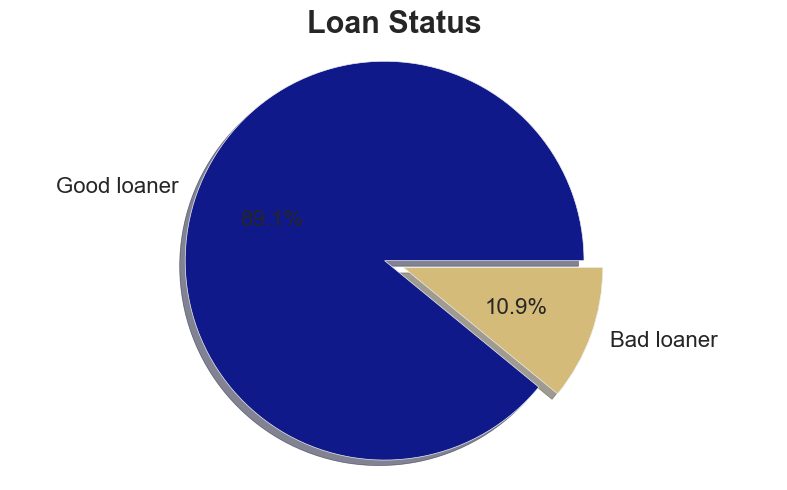

In [273]:

# Create figure with transparent background
fig = plt.figure(figsize=(8, 5), facecolor='none')  # Transparent background

my_labels = ['Good loaner', 'Bad loaner']
my_colors = ['#0f198a', '#d4bb79']
my_explode = (0, 0.1)

# Create pie chart with start angle on the right
plt.pie(
    data.loan_status.value_counts(),
    labels=my_labels,
    autopct='%1.1f%%',
    startangle=0,  # Start at the right (3 o'clock)
    shadow=True,
    colors=my_colors,
    explode=my_explode,
    textprops={'fontsize': 16}
)

# Bold title
plt.title('Loan Status', fontsize=22, fontweight='bold')

# Ensure it's a perfect circle
plt.axis('equal')
plt.tight_layout()
plt.show()


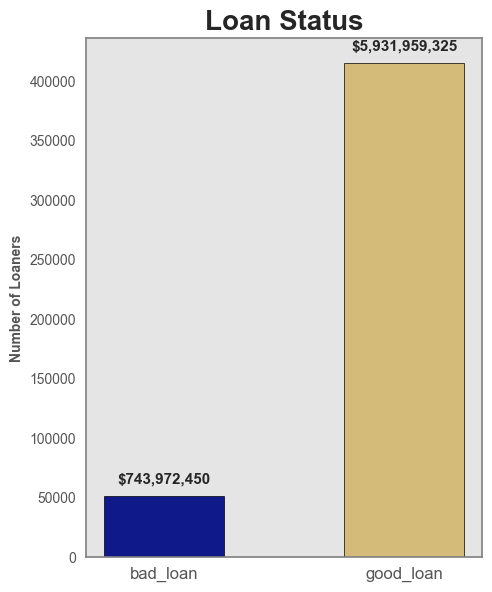

In [274]:
# Group data
grouped = data.groupby('loan_status').agg({
    'loan_amnt': 'sum',
    'loan_status': 'count'
}).rename(columns={'loan_status': 'count'}).reset_index()

# Sort for consistency
grouped = grouped.sort_values('loan_status')

# Bar settings
bar_width = 0.5
x_pos = range(len(grouped))  # Evenly spaced

# Plot
fig, ax = plt.subplots(figsize=(5, 6), facecolor='none')  # Smaller, tighter figure

bars = ax.bar(
    x=x_pos,
    height=grouped['count'],
    width=bar_width,
    color=['#0f198a', '#d4bb79'],
    edgecolor='black'
)

# Add labels (loan_amnt) on top of bars
for bar, loan_amnt in zip(bars, grouped['loan_amnt']):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + max(grouped['count']) * 0.02,
        f"${int(loan_amnt):,}",
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold'
    )

# X-axis labels
ax.set_xticks(x_pos)
ax.set_xticklabels(grouped['loan_status'], fontsize=12)

# Titles and labels
ax.set_title('Loan Status', fontsize=20, fontweight='bold')
ax.set_ylabel('Number of Loaners', fontsize=10, fontweight='bold')

# Show full border
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.2)
    spine.set_edgecolor('gray')

# Remove grid
ax.grid(False)

plt.tight_layout(pad=1)
plt.show()


## 2. Who applies for loan?

In [275]:
title_loan = " ".join(str(tujuan) for tujuan in data.emp_title)

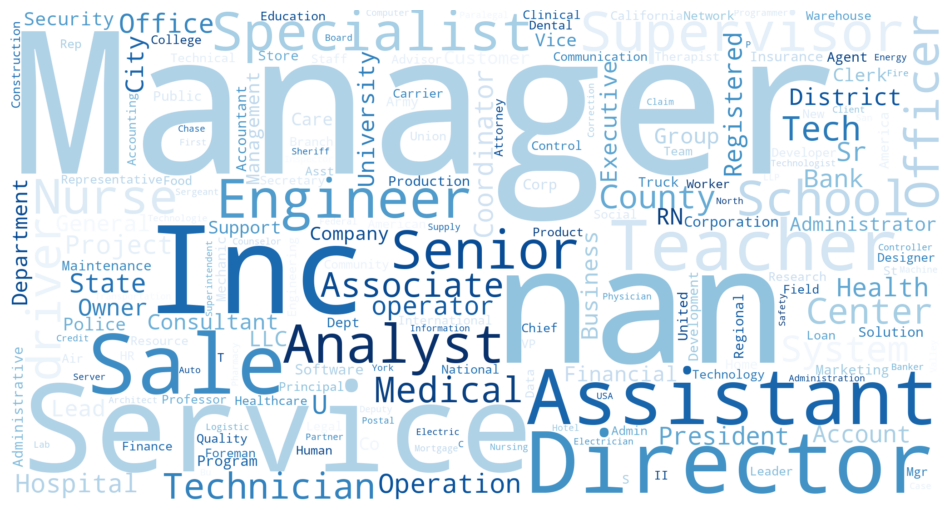

In [276]:
word_cloud1 = WordCloud(collocations = False, background_color = 'white',
                        width = 2048, height = 1080, colormap='Blues').generate(title_loan)

plt.figure(figsize = (12, 12))
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

## 3. Borrowers Domicile

In [277]:
# Get counts and determine the state with highest borrowers
state_counts = data['addr_state'].value_counts(ascending=False)
order = state_counts.index
top_state = state_counts.idxmax()
total = state_counts.sum()


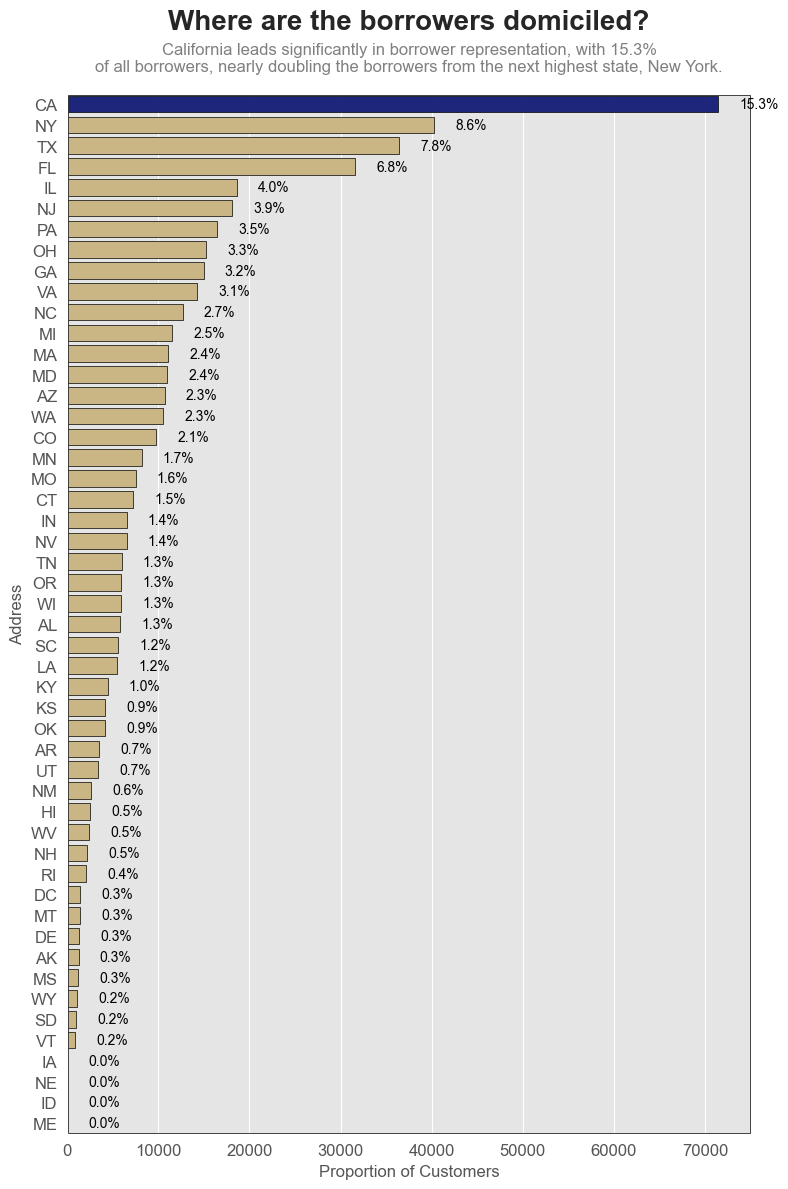

In [278]:

# Create a color palette with a special color for the top state
colors = ['#d4bb79' if state != top_state else '#0f198a' for state in order]  # red for top state

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 12))

# Plot with individual bar colors
sns.countplot(
    y='addr_state',
    data=data,
    order=order,
    palette=colors,
    edgecolor='black',
    ax=ax
)

# Add percentage labels to each bar
for p in ax.patches:
    count = p.get_width()
    percentage = f'{(count / total) * 100:.1f}%'
    ax.text(
        count + total * 0.005,  # slightly offset from end of bar
        p.get_y() + p.get_height() / 2,
        percentage,
        va='center',
        fontsize=10,
        color='black'
    )

# Center title and description on the canvas
ax.set_title('Where are the borrowers domiciled?\n', fontsize=20, fontweight='bold', pad=25, loc='center')

# Center description text (in the middle and near the top)
ax.text(
    0.5, 1.05, 
    'California leads significantly in borrower representation, with 15.3%\nof all borrowers, nearly doubling the borrowers from the next highest state, New York.',
    transform=ax.transAxes, 
    fontsize=12, 
    color='gray', 
    ha='center', va='top'
)

ax.set_ylabel("Address", fontsize=12)
ax.set_xlabel("Proportion of Customers", fontsize=12)
plt.yticks(size=12)
plt.xticks(size=12)

# Add border around the entire chart
rect = patches.Rectangle(
    (0, 0), 1, 1,
    transform=ax.transAxes,
    linewidth=2,
    edgecolor='black',
    facecolor='none'
)
ax.add_patch(rect)

plt.tight_layout()
plt.show()


In [279]:
region_counts = data['region'].value_counts(ascending=False)
order = region_counts.index
top_state = region_counts.idxmax()
total = region_counts.sum()

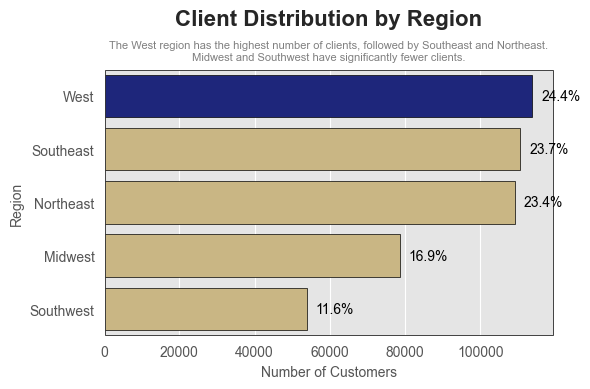

In [280]:
# Define custom colors: highlight the top state
colors = ['#0f198a' if state == top_state else '#d4bb79' for state in order]

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 4))

# Plot countplot with individual bar colors
sns.countplot(
    y='region',
    data=data,
    order=order,
    palette=colors,
    edgecolor='black',
    ax=ax
)

# Add percentage labels to each bar
for p in ax.patches:
    count = p.get_width()
    percentage = f'{(count / total) * 100:.1f}%'
    ax.text(
        count + total * 0.005,  # offset to the right
        p.get_y() + p.get_height() / 2,
        percentage,
        va='center',
        fontsize=10,
        color='black'
    )

# Title and description
ax.set_title('Client Distribution by Region\n', fontsize=16, fontweight='bold', pad=15, loc='center')
ax.text(
    0.5, 1.11,
    'The West region has the highest number of clients, followed by Southeast and Northeast.\nMidwest and Southwest have significantly fewer clients.',
    transform=ax.transAxes,
    fontsize=8,
    color='gray',
    ha='center',
    va='top'
)

# Axis labels and ticks
ax.set_ylabel("Region", fontsize=10)
ax.set_xlabel("Number of Customers", fontsize=10)
plt.yticks(size=10)
plt.xticks(size=10)

# Add black border around the entire chart
rect = patches.Rectangle(
    (0, 0), 1, 1,
    transform=ax.transAxes,
    linewidth=2,
    edgecolor='black',
    facecolor='none'
)
ax.add_patch(rect)

# Final layout and display
plt.tight_layout()
plt.show()

## 4. Loan Purpose?

In [281]:

# Sort the 'purpose' by frequency
order = data['purpose'].value_counts(ascending=False).index
counts = data['purpose'].value_counts()
total = counts.sum()
top_reason = counts.idxmax()

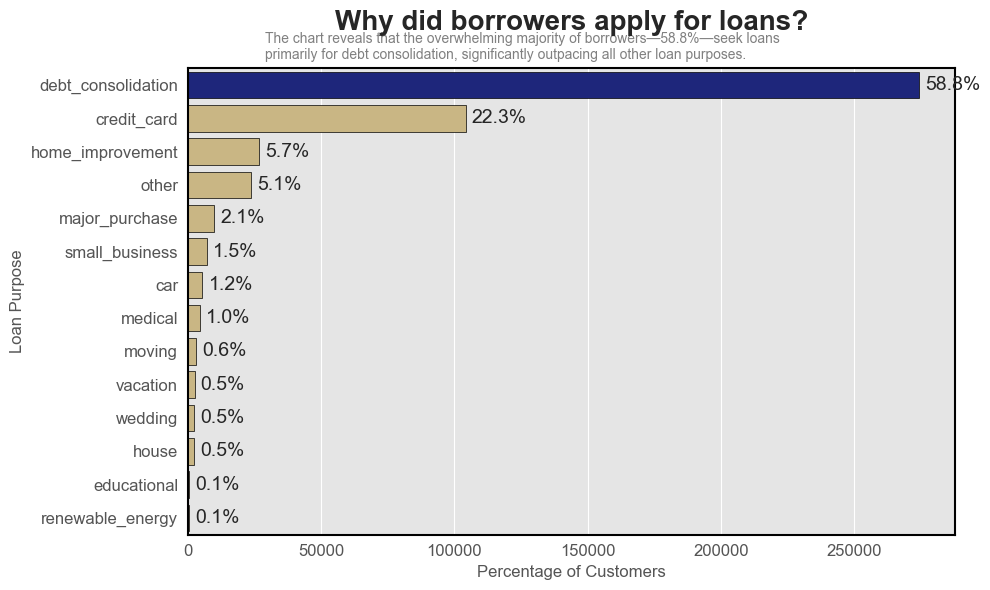

In [282]:
# Create color list: highlight top reason
colors = ['#0f198a' if purpose == top_reason else '#d4bb79' for purpose in order]

# Create figure and axis
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    y='purpose',
    data=data,
    order=order,
    palette=colors,
    edgecolor='black'
)

# Title and subtitle
plt.title('Why did borrowers apply for loans?\n', fontsize=20, fontweight='bold')
ax.text(0.1, 1.02, 'The chart reveals that the overwhelming majority of borrowers—58.8%—seek loans\nprimarily for debt consolidation, significantly outpacing all other loan purposes.', transform=ax.transAxes,
        fontsize=10, color='gray')

# Labels
ax.set_ylabel("Loan Purpose", fontsize=12)
ax.set_xlabel("Percentage of Customers", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add percentage labels to bars
for p in ax.patches:
    percent = (p.get_width() / total) * 100
    ax.text(p.get_width() + total * 0.005, p.get_y() + p.get_height() / 2,
            f'{percent:.1f}%', va='center', fontsize=14)

# Gridlines
ax.xaxis.grid(True)
ax.set_axisbelow(True)

# Border around the entire chart
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.5)
    spine.set_edgecolor('black')

plt.tight_layout()
plt.show()



## 5. The length of the month the loan is funded

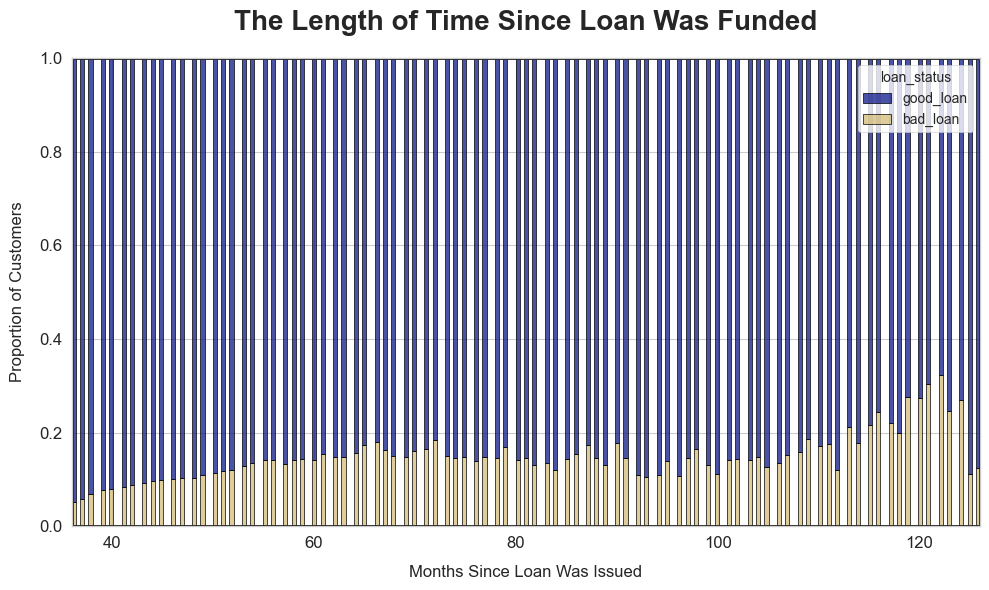

In [283]:


# Set style for cleaner aesthetics
sns.set_style("whitegrid")

# Define color palette
my_colors = ['#0f198a', '#d4bb79']

# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.histplot(
    data=data,
    x="mths_since_issue_d",
    hue="loan_status",
    multiple="fill",
    palette=my_colors,
    edgecolor='black',
    linewidth=0.5
)

# Set and format title
plt.title('The Length of Time Since Loan Was Funded', fontsize=20, weight='bold', pad=20)

# Axis labels
ax.set_xlabel("Months Since Loan Was Issued", fontsize=12, labelpad=10)
ax.set_ylabel("Proportion of Customers", fontsize=12, labelpad=10)

# Tick size
plt.xticks(size=12)
plt.yticks(size=12)

# Add border around the entire chart
rect = patches.Rectangle(
    (0, 0), 1, 1,
    transform=ax.transAxes,
    linewidth=2,
    edgecolor='black',
    facecolor='none'
)
ax.add_patch(rect)

# Improve spacing and layout
plt.tight_layout()
plt.show()


## 6. Yearly Trend by Loan Status

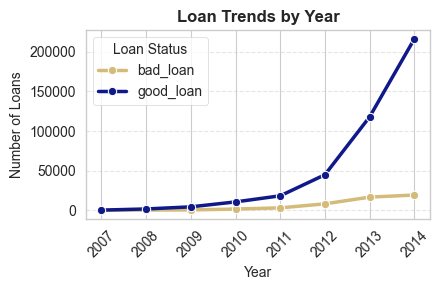

In [284]:


# Group by year and loan_status, count number of loans
yearly_funded = data.groupby(['years', 'loan_status'])['id'].count().reset_index()

# Define colors (must match the actual order of categories in the data)
my_colors = ['#d4bb79', '#0f198a']  # Adjust order if needed

# Set figure size
plt.figure(figsize=(4.5, 3))

# Line plot
sns.lineplot(
    data=yearly_funded,
    x='years',
    y='id',
    hue='loan_status',
    palette=my_colors,
    marker='o',
    linewidth=2.5
)

# Style adjustments
plt.title('Loan Trends by Year', fontsize=12, fontweight='bold')
plt.xlabel('Year', fontsize=10)
plt.ylabel('Number of Loans', fontsize=10)  # Corrected label
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Legend title only (let seaborn handle labels automatically)
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()


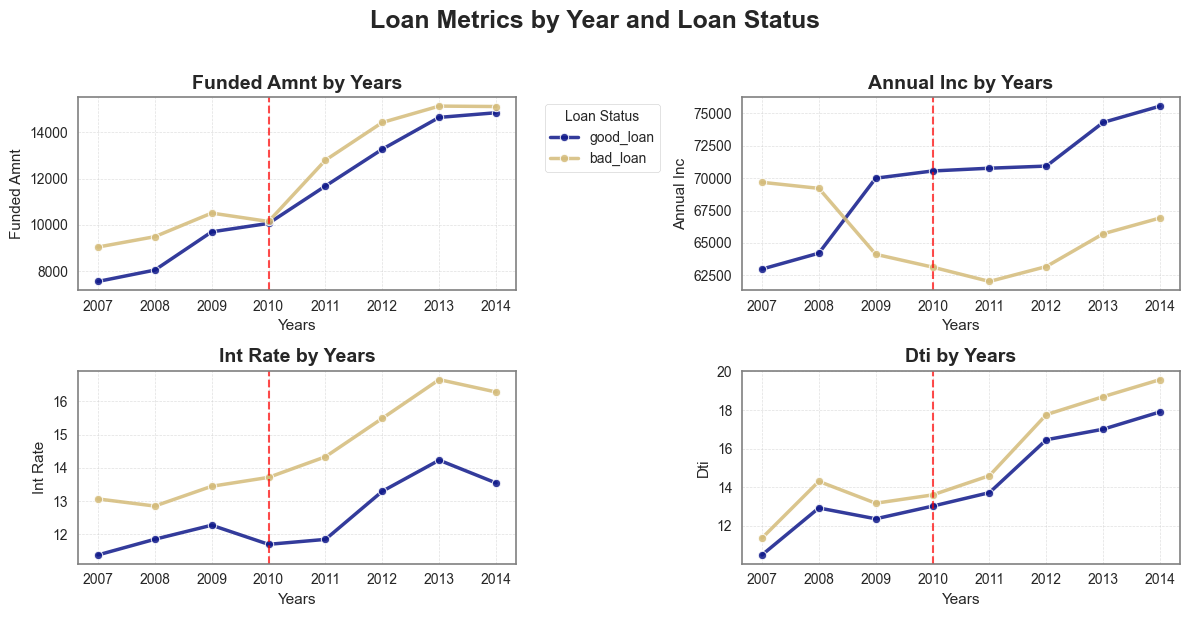

In [285]:

# Settings
colors = ['#0f198a', '#d4bb79']
linewidth = 2.5
marker = 'o'
bbox_to_anchor = (1.05, 1)
y_vars = ['funded_amnt', 'annual_inc', 'int_rate', 'dti']

# Create 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
axes = axes.flatten()

# Plot each variable
for i, y in enumerate(y_vars):
    ax = axes[i]
    sns.lineplot(
        data=data,
        x='years',
        y=y,
        hue='loan_status',
        palette=colors,
        linewidth=linewidth,
        marker=marker,
        markersize=6,
        alpha=0.85,
        errorbar=None,
        ax=ax
    )

    # Vertical reference line
    ax.axvline(x=2010, color='red', linestyle='--', linewidth=1.5, alpha=0.7)

    # Title and labels
    ax.set_title(f'{y.replace("_", " ").title()} by Years', fontsize=14, fontweight='bold')
    ax.set_xlabel("Years", fontsize=11)
    ax.set_ylabel(y.replace("_", " ").title(), fontsize=11)

    # Grid
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

    # Add visible plot borders (spines)
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(1.2)
        spine.set_edgecolor('gray')

    # Legend logic
    if i == 0:
        ax.legend(title="Loan Status", loc='upper left', bbox_to_anchor=bbox_to_anchor)
    else:
        ax.get_legend().remove()

# Layout
plt.suptitle("Loan Metrics by Year and Loan Status", fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


In [287]:
data.drop('years', axis=1, inplace=True)

## 7. Grade

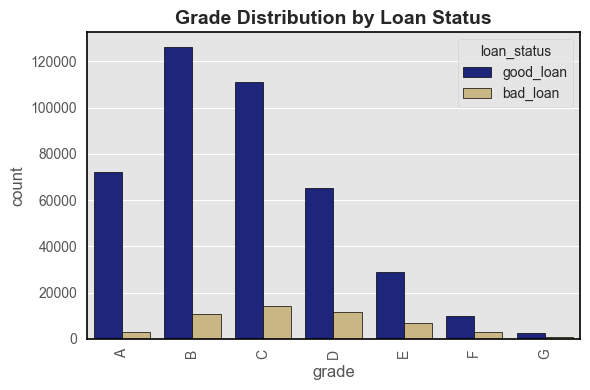

In [288]:


# Set the style for the plot
plt.style.use("ggplot")
sorted_grades = sorted(data['grade'].dropna().unique())

# Define your custom color palette
custom_palette = {
    'good_loan': '#0f198a',    
    'bad_loan': '#d4bb79'     
}

# Create a figure and a single set of axes
fig, ax = plt.subplots(figsize=(6, 4))

# Create a countplot for the 'grade' column with the loan_status hue
sns.countplot(x=data['grade'], hue=data["loan_status"], ax=ax, edgecolor='black', palette=custom_palette, order=sorted_grades)

# Set the title and rotate the x-axis labels
ax.set_title('Grade Distribution by Loan Status', fontsize=14, fontweight='bold')
ax.tick_params(axis='x', rotation=90)

# Add borders to the chart (the axes frame)
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.2)
    spine.set_edgecolor('black')

# Adjust layout to prevent overlap and display the plot
plt.tight_layout()
plt.show()


# Exploratory Data Analysis

## Multivariate Analysis

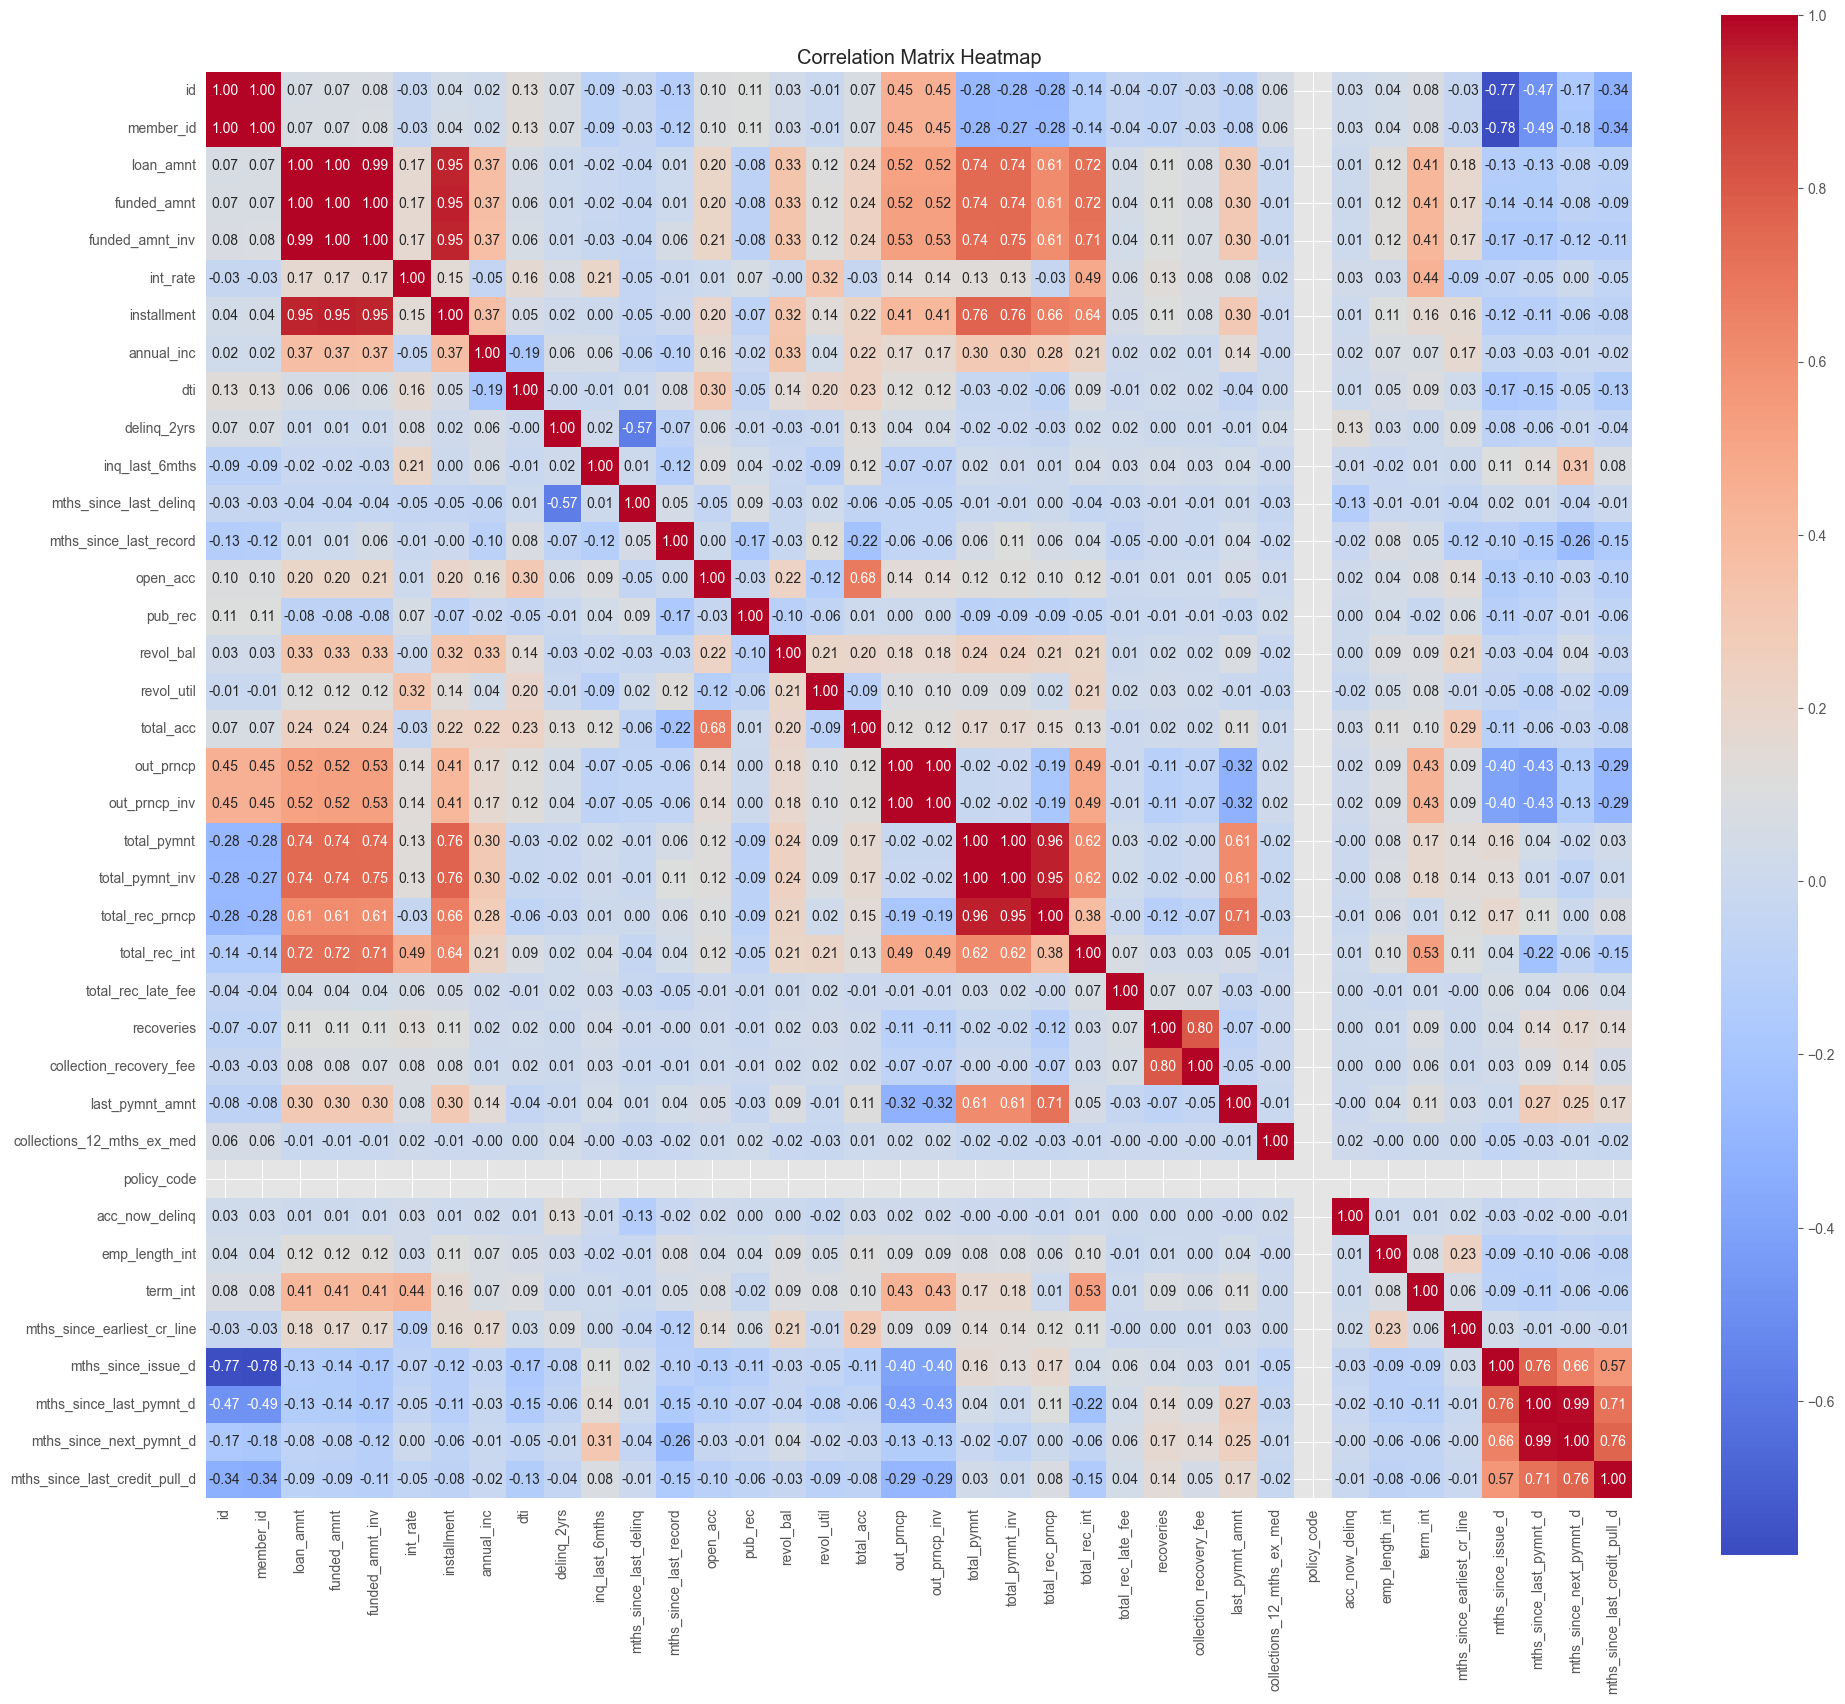

In [289]:

# Compute correlation matrix
corr_matrix = data.corr(numeric_only=True)

# Set plot size
plt.figure(figsize=(23, 20))

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)

# Show plot
plt.title("Correlation Matrix Heatmap")
plt.show()


To avoid redundancy and potential multicollinearity, highly correlated features will be excluded from the analysis.

In [290]:
lis_to_drop =['funded_amnt', 'funded_amnt_inv', 'installment', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
              'total_rec_prncp', 'total_rec_int', 'collection_recovery_fee', 'last_pymnt_amnt', 'mths_since_last_pymnt_d',
              'mths_since_next_pymnt_d', 'mths_since_last_credit_pull_d', 'region']


In [291]:
data.drop(lis_to_drop, axis=1, inplace=True)

## Check Cardinality Data

### Categorical Data

In [292]:
print(data.select_dtypes(include='object').nunique())

term                        2
grade                       7
emp_title              205475
home_ownership              6
verification_status         3
pymnt_plan                  2
purpose                    14
title                   63098
addr_state                 50
initial_list_status         2
application_type            1
loan_status                 2
dtype: int64


In [293]:
data.drop(['title', 'application_type', 'emp_title'], axis=1, inplace=True)

### Numerical Data

In [294]:
print(data.select_dtypes(exclude='object').nunique())

id                             466285
member_id                      466285
loan_amnt                        1352
int_rate                          506
annual_inc                      31901
dti                              3997
delinq_2yrs                        24
inq_last_6mths                     28
mths_since_last_delinq            145
mths_since_last_record            123
open_acc                           62
pub_rec                            26
revol_bal                       58142
revol_util                       1269
total_acc                         112
out_prncp                      135665
total_rec_late_fee               5808
recoveries                      22773
collections_12_mths_ex_med          9
policy_code                         1
acc_now_delinq                      6
emp_length_int                     10
term_int                            2
mths_since_earliest_cr_line       515
mths_since_issue_d                 91
dtype: int64


In [295]:
data.drop(['policy_code'], axis=1, inplace=True)

I deleted features that contained either single values or too many unique values (in categorical data). For now, I will keep `emp_title` because we’ll need it later for insights. Once we’ve extracted the insights, I’ll delete `emp_title`.

In [296]:
# Loop through each feature with object data type
for col in data.select_dtypes(include='object').columns.tolist():
    # Shows the distribution of unique values ​​of each feature
    print("Distribution of unique values ​​for features", col)
    print(data[col].value_counts(normalize=True) * 100)
    print('\n')

Distribution of unique values ​​for features term
term
36 months    72.477776
60 months    27.522224
Name: proportion, dtype: float64


Distribution of unique values ​​for features grade
grade
B    29.365946
C    26.870476
D    16.489486
A    16.056060
E     7.668486
F     2.837106
G     0.712440
Name: proportion, dtype: float64


Distribution of unique values ​​for features home_ownership
home_ownership
MORTGAGE    50.586015
RENT        40.420129
OWN          8.943886
OTHER        0.039032
NONE         0.010723
ANY          0.000214
Name: proportion, dtype: float64


Distribution of unique values ​​for features verification_status
verification_status
Verified           36.041262
Source Verified    32.167666
Not Verified       31.791072
Name: proportion, dtype: float64


Distribution of unique values ​​for features pymnt_plan
pymnt_plan
n    99.99807
y     0.00193
Name: proportion, dtype: float64


Distribution of unique values ​​for features purpose
purpose
debt_consolidation    58.80

At this stage, features that are significantly dominated by one value will be removed from the dataset. This is done to eliminate features that do not provide additional variation or information in the modeling process.

In [297]:
# Delete fiture 'pymnt_plan' from dataset 
data.drop('pymnt_plan', axis=1, inplace=True)

## Univariate Analysis

### Categorical Data

In [298]:
# indentifying the categorical variables 
cat_var= data.select_dtypes(include= ["object"]).columns
print(cat_var)



Index(['term', 'grade', 'home_ownership', 'verification_status', 'purpose',
       'addr_state', 'initial_list_status', 'loan_status'],
      dtype='object')


Let's exclude the `emp_title` to make our visualization more effective.

In [299]:
cat_var = cat_var.drop("emp_title", errors='ignore')

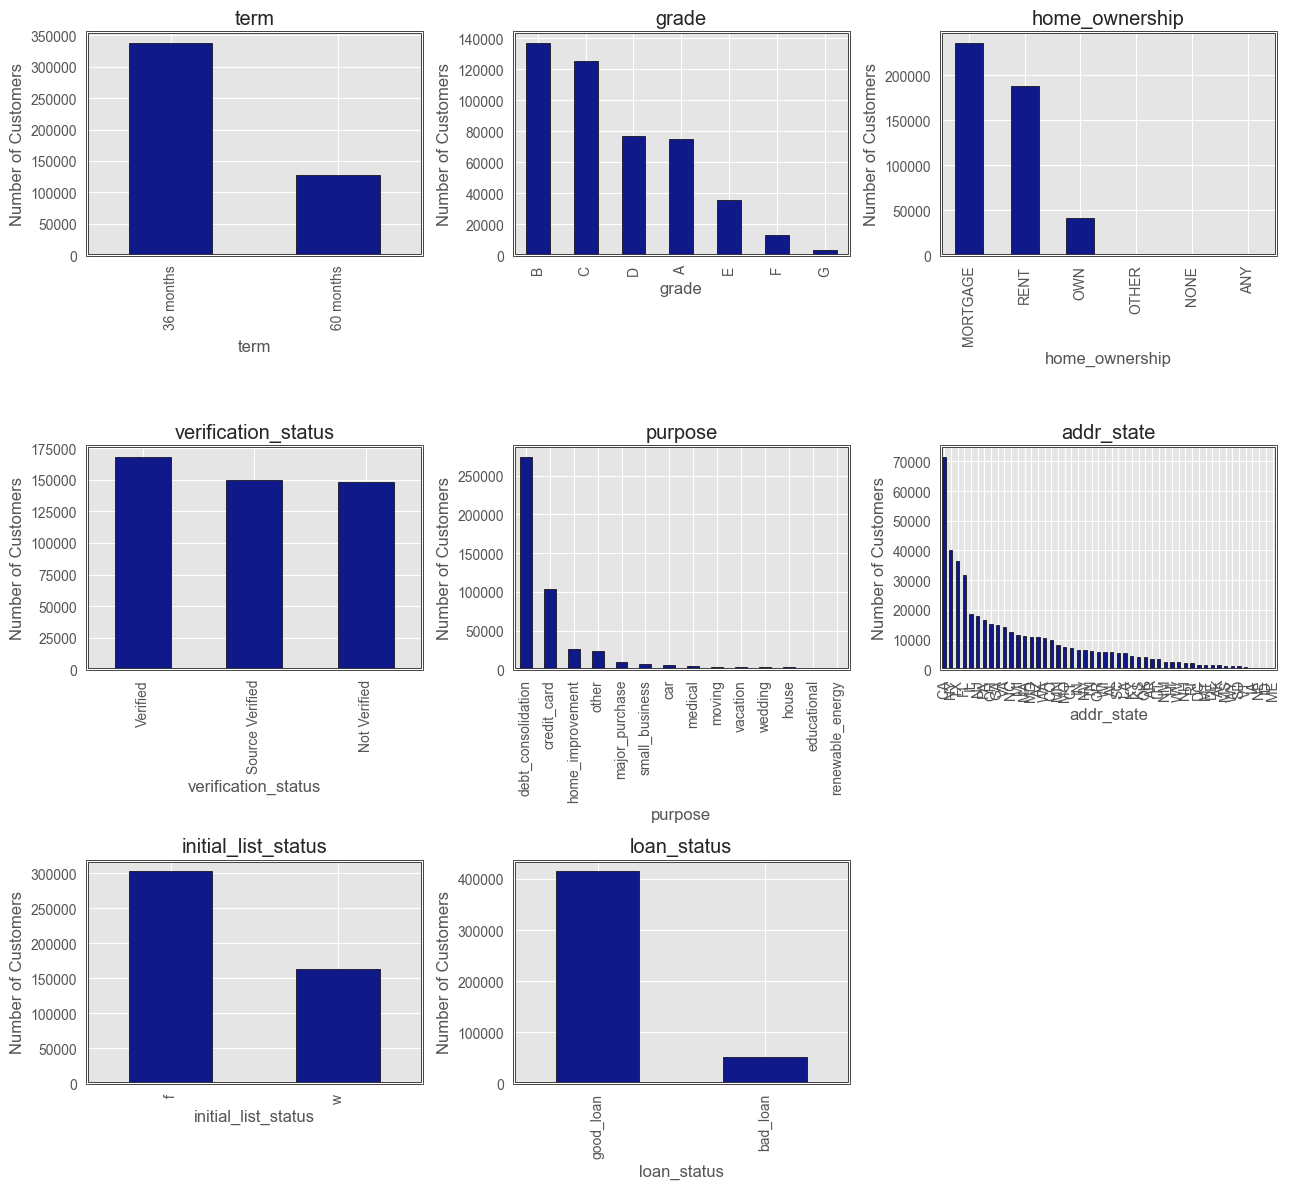

In [300]:

# Set the style
plt.style.use("ggplot")

# Create the canvas
fig, axes = plt.subplots(3, 3, figsize=(13, 12))
axes = axes.flatten()  # Flatten to easily iterate

# Plot each categorical variable
for idx, column in enumerate(cat_var):
    ax = axes[idx]
    
    # Plot bar chart
    data[column].value_counts().plot(kind="bar", ax=ax, edgecolor='black', color='#0f198a' )
    
    # Labeling
    ax.set_xlabel(column)
    ax.set_ylabel("Number of Customers")
    ax.set_title(column)
    
    # Draw border around the whole plot
    rect = patches.Rectangle(
        (0, 0), 1, 1,
        transform=ax.transAxes,
        linewidth=2,
        edgecolor='black',
        facecolor='none',
        clip_on=False
    )
    ax.add_patch(rect)

# Hide unused subplots if any
for j in range(len(cat_var), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Numerical Data

In [301]:
# Identifying the numerical variables
num_var = data.select_dtypes(include=np.number)
num_var.head()

,id,member_id,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,...,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,emp_length_int,term_int,mths_since_earliest_cr_line,mths_since_issue_d
0,1077501,1296599,5000,10.65,24000.0,27.65,0.0,1.0,NaN,NaN,...,9.0,0.0,0.00,0.00,0.0,0.0,10.0,36.0,395.0,72
1,1077430,1314167,2500,15.27,30000.0,1.00,0.0,5.0,NaN,NaN,...,4.0,0.0,0.00,117.08,0.0,0.0,1.0,60.0,224.0,72
2,1077175,1313524,2400,15.96,12252.0,8.72,0.0,2.0,NaN,NaN,...,10.0,0.0,0.00,0.00,0.0,0.0,10.0,36.0,193.0,72
3,1076863,1277178,10000,13.49,49200.0,20.00,0.0,1.0,35.0,NaN,...,37.0,0.0,16.97,0.00,0.0,0.0,10.0,36.0,262.0,72
4,1075358,1311748,3000,12.69,80000.0,17.94,0.0,0.0,38.0,NaN,...,38.0,766.9,0.00,0.00,0.0,0.0,1.0,60.0,263.0,72


In [302]:
num_var.columns

Index(['id', 'member_id', 'loan_amnt', 'int_rate', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'total_rec_late_fee',
       'recoveries', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'emp_length_int', 'term_int', 'mths_since_earliest_cr_line',
       'mths_since_issue_d'],
      dtype='object')

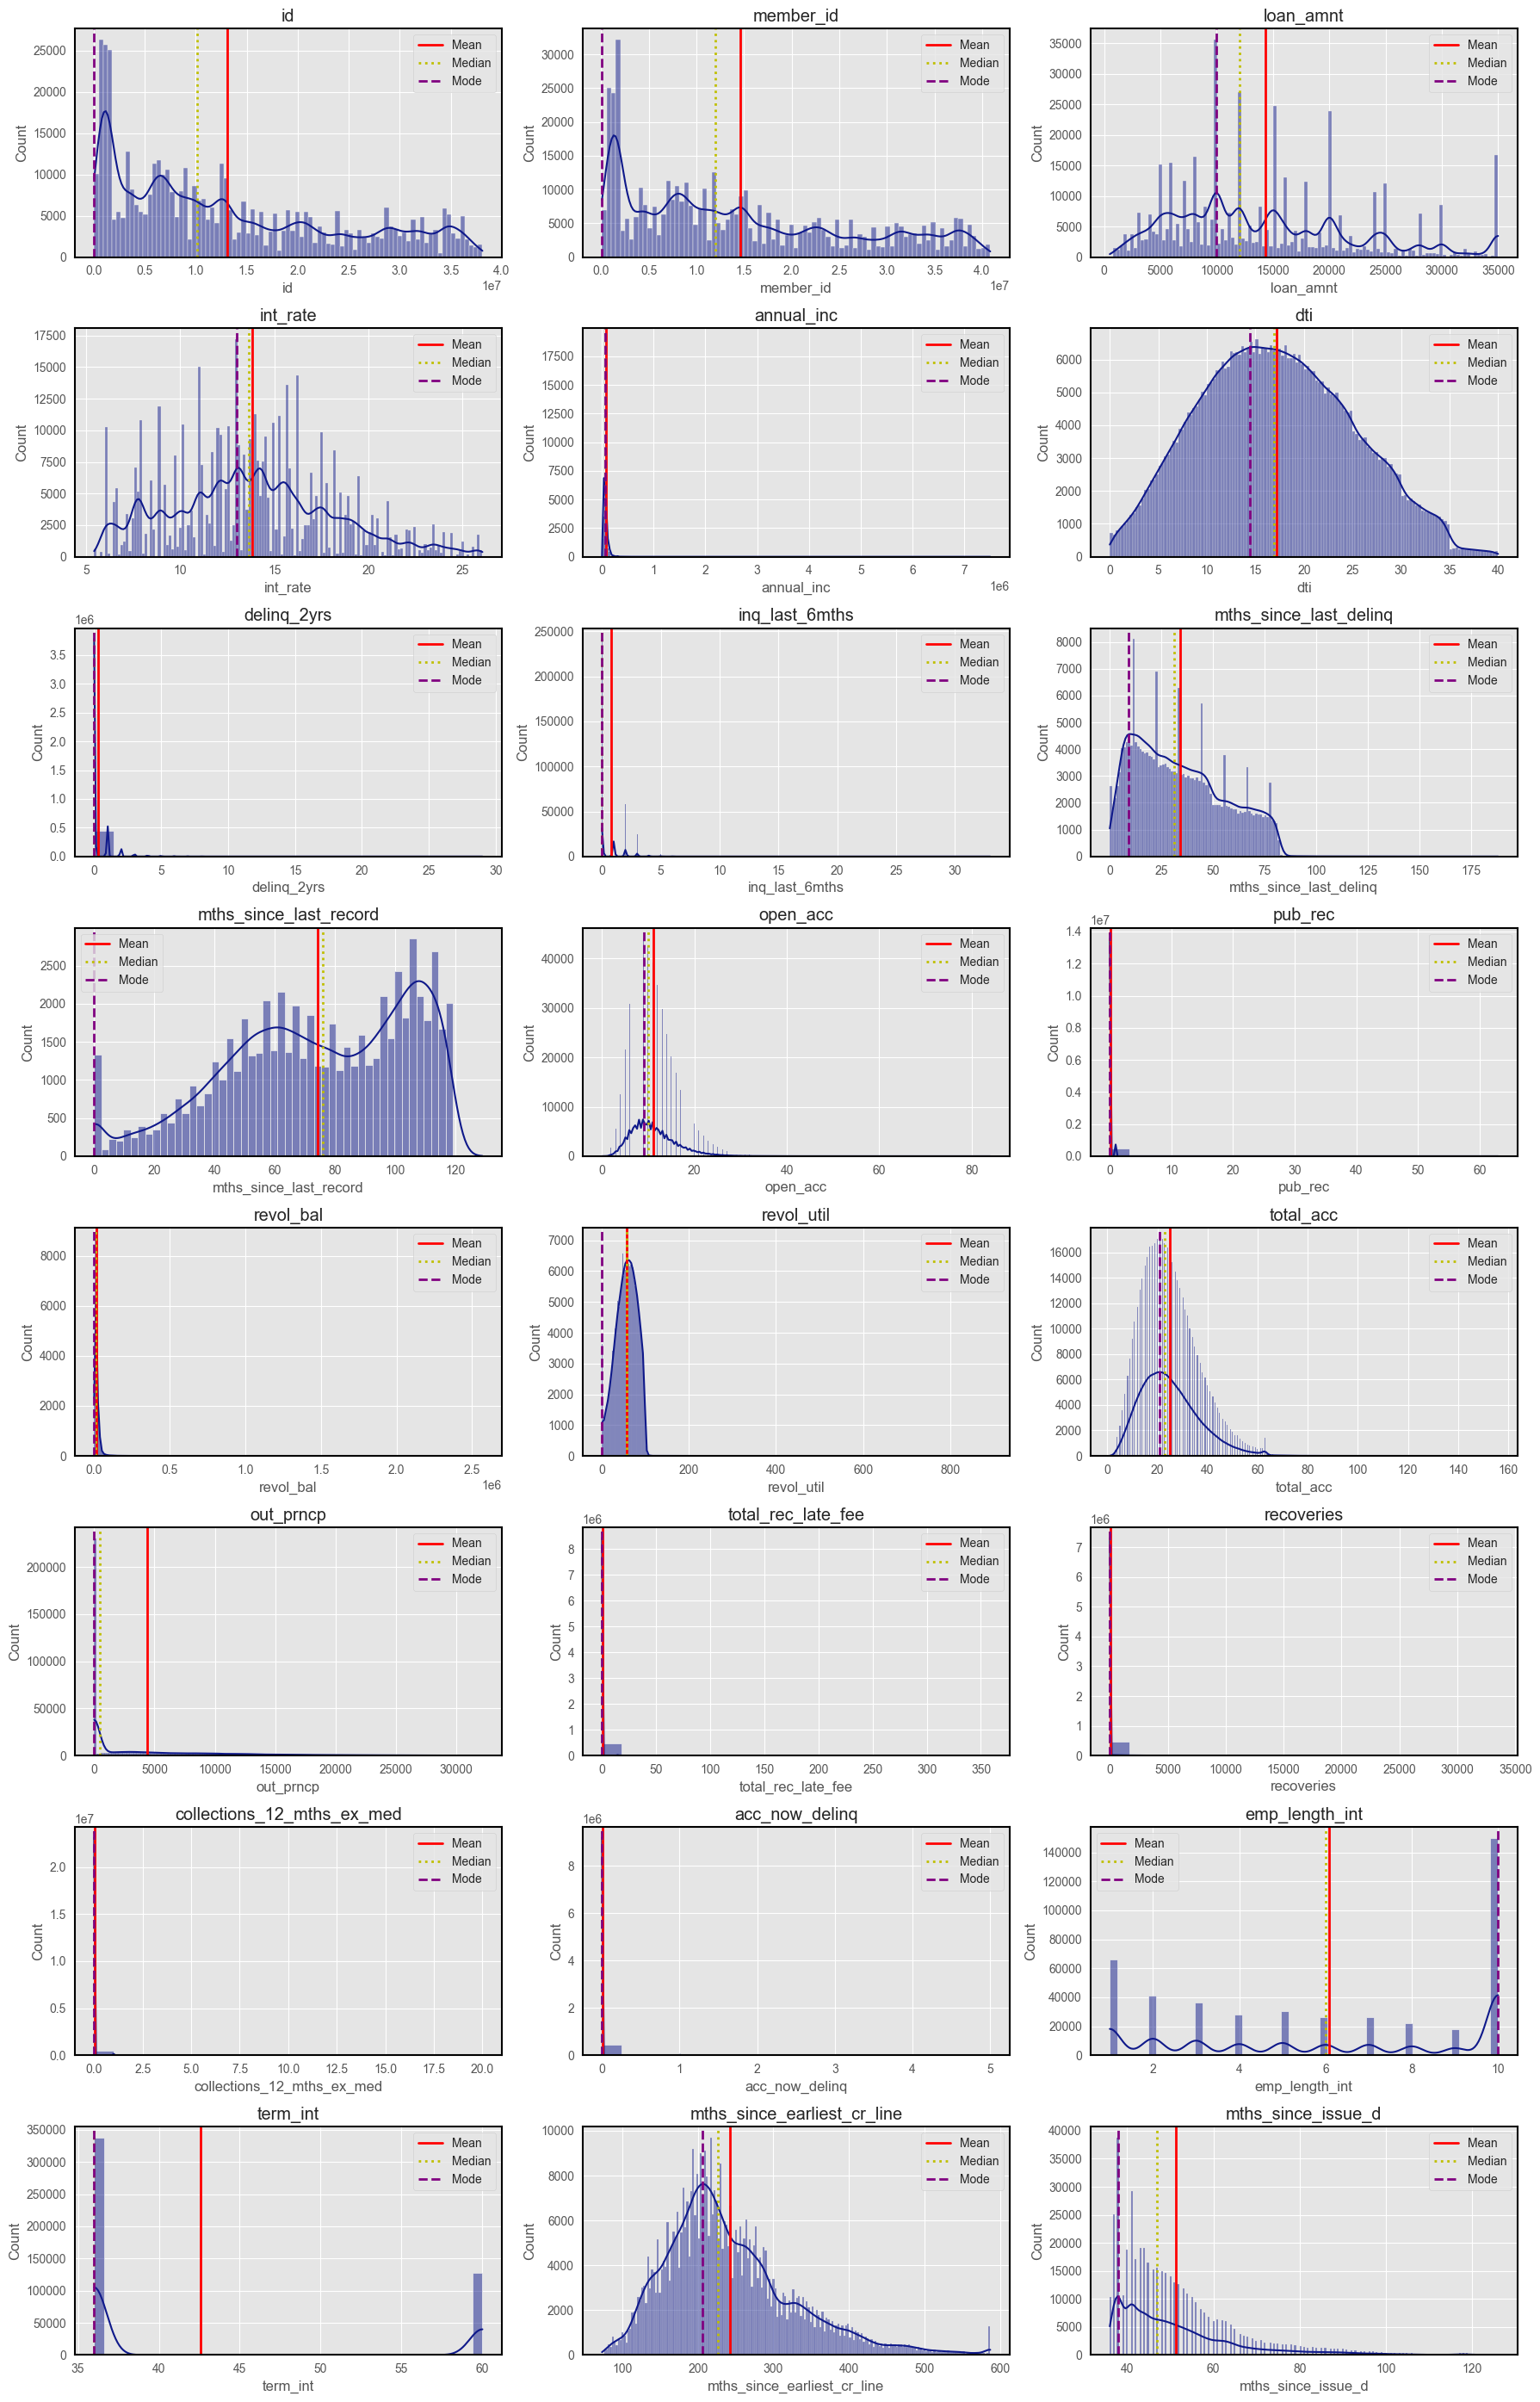

In [303]:
# Style
plt.style.use("ggplot")

# Select numeric columns
numeric_columns = data.select_dtypes(exclude='object').columns.tolist()

# Create a figure with 8 rows and 3 columns
fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(18, 28))
axes = axes.flatten()

for idx, column in enumerate(numeric_columns):
    ax = axes[idx]
    
    # Calculate statistics
    average = data[column].mean()
    median = data[column].median()
    mode = data[column].mode().iloc[0]

    # Plot distribution
    sns.histplot(data[column], kde=True, ax=ax, color='#0f198a')
    ax.axvline(average, color='r', linestyle='solid', linewidth=2, label='Mean')
    ax.axvline(median, color='y', linestyle='dotted', linewidth=2, label='Median')
    ax.axvline(mode, color='purple', linestyle='dashed', linewidth=2, label='Mode')

    ax.set_title(column)
    ax.legend()

    # Add border to each subplot
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(1.5)
        spine.set_color('black')

# Hide unused subplots if fewer than 24 columns
for j in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Bivariate Analysis

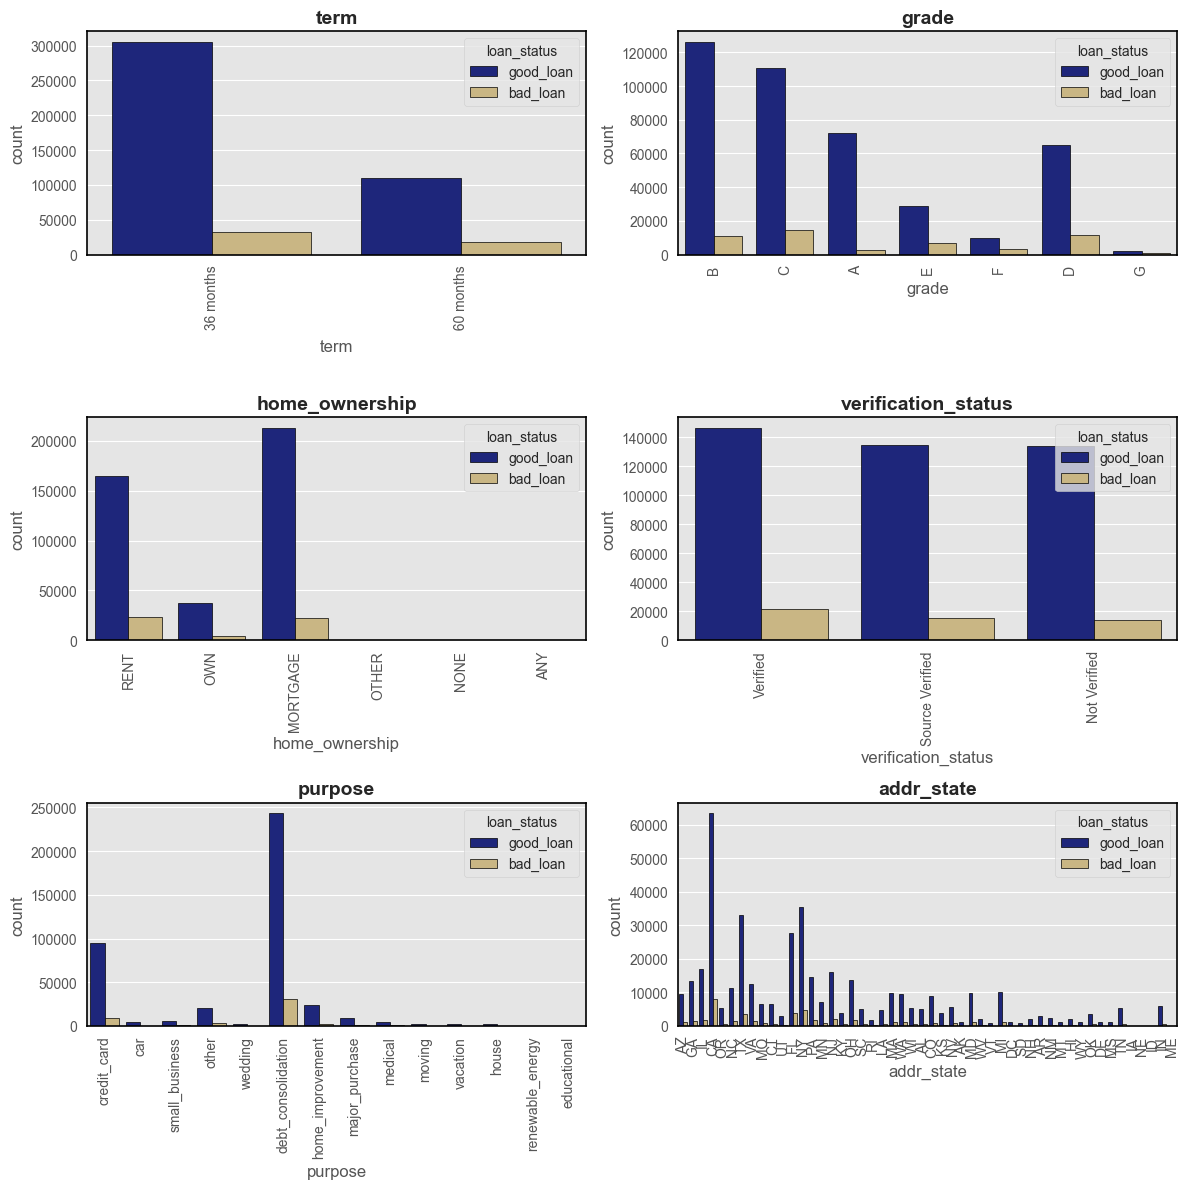

In [304]:
# Style
plt.style.use("ggplot")

custom_palette = {
    'good_loan': '#0f198a',    
    'bad_loan': '#d4bb79'     # Red for the other (or pick any other color you prefer)
}

# Create a single figure with 3 columns and 2 rows
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()  # Flatten for easy iteration

# Plot countplots for the first 6 categorical variables
for idx, column in enumerate(cat_var):
    if idx >= 6:
        break

    ax = axes[idx]
    
    # Countplot with bar borders
    sns.countplot(x=data[column], hue=data["loan_status"], ax=ax, edgecolor='black', palette=custom_palette)
    
    # Title and label rotation
    ax.set_title(column, fontsize=14, fontweight='bold')
    ax.tick_params(axis='x', rotation=90)

    # Add border to the whole chart (axes frame)
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(1.2)
        spine.set_edgecolor('black')

# Hide unused subplots if fewer than 6 variables
for j in range(len(cat_var), 6):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


# Data Preprocessing

## Handle Duplicated

Checking the number of unique values ​​in the `id` column and the number of unique values ​​in the column that shows the individual's identity `member_id`


In [305]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'term', 'int_rate', 'grade',
       'home_ownership', 'annual_inc', 'verification_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'total_rec_late_fee', 'recoveries',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'loan_status',
       'emp_length_int', 'term_int', 'mths_since_earliest_cr_line',
       'mths_since_issue_d'],
      dtype='object')

In [306]:
jumlah_baris = data['id'].nunique()
jumlah_unik = data['member_id']. nunique()
# Check whether each row represents one individual
if jumlah_baris == jumlah_unik:
    print( "Each row represents one individual")
else:
    print("There is duplication in the data.")

Each row represents one individual


There is no duplicated data in this dataset.

In [307]:
data.drop(['id', 'member_id'], axis=1, inplace=True)

## Handle Missing Value

In [308]:
# Calculate the percentage of missing values ​​for each feature
check_missing = data.isnull().sum() * 100 / data. shape [0]
# Select only features that have missing values
missing_values = check_missing[check_missing > 0].sort_values(ascending=False)
# Show result
print("Percentage of missing values ​​for each feature:")
missing_values

Percentage of missing values ​​for each feature:


mths_since_last_record         86.566585
mths_since_last_delinq         53.690554
emp_length_int                  4.505399
revol_util                      0.072917
collections_12_mths_ex_med      0.031097
delinq_2yrs                     0.006219
inq_last_6mths                  0.006219
open_acc                        0.006219
pub_rec                         0.006219
total_acc                       0.006219
acc_now_delinq                  0.006219
mths_since_earliest_cr_line     0.006219
annual_inc                      0.000858
dtype: float64

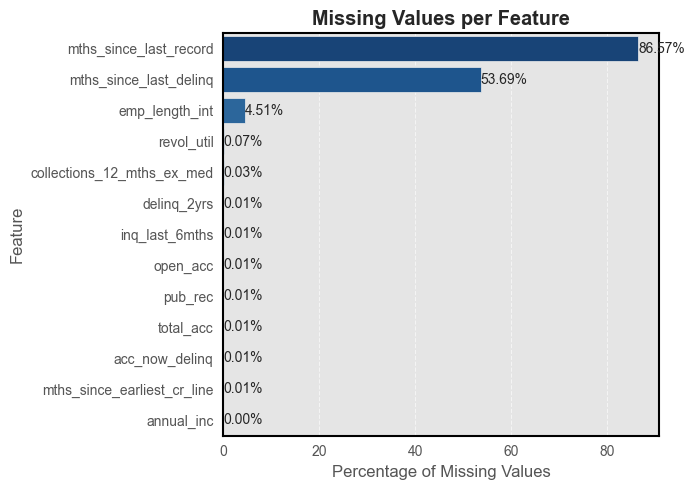

In [309]:
# Create the horizontal bar chart
plt.figure(figsize=(7, 5))
ax = sns.barplot(x=missing_values, y=missing_values.index, palette="Blues_r")

# Add percentage labels to the bars
for index, value in enumerate(missing_values):
    plt.text(value, index, f'{value:.2f}%', va='center', fontsize=10)

# Labels and title
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Feature')
plt.title('Missing Values per Feature', fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Add border to the whole chart
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.5)
    spine.set_edgecolor('black')

plt.tight_layout()
plt.show()


Drop all features where the proportion of missing values exceeds 80%

In [312]:
data.drop('mths_since_last_record', axis=1, inplace=True)

### Data Imputation

I will use .describe() to identify the most appropriate method for imputing missing values.

In [313]:
data[['annual_inc', 'acc_now_delinq', 'total_acc', 'pub_rec',
      'open_acc', 'inq_last_6mths', 'delinq_2yrs', 'collections_12_mths_ex_med', 'revol_util',
      'mths_since_last_delinq', 'mths_since_earliest_cr_line', 'emp_length_int']].describe()

,annual_inc,acc_now_delinq,total_acc,pub_rec,open_acc,inq_last_6mths,delinq_2yrs,collections_12_mths_ex_med,revol_util,mths_since_last_delinq,mths_since_earliest_cr_line,emp_length_int
count,4.662810e+05,466256.000000,466256.000000,466256.000000,466256.000000,466256.000000,466256.000000,466140.000000,465945.000000,215934.000000,466256.000000,445277.000000
mean,7.327738e+04,0.004002,25.064430,0.160564,11.187069,0.804745,0.284678,0.009085,56.176947,34.104430,242.385374,6.074774
std,5.496357e+04,0.068637,11.600141,0.510863,4.987526,1.091598,0.797365,0.108648,23.732628,21.778487,86.460310,3.500574
min,1.896000e+03,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.000000,1.000000
25%,4.500000e+04,0.000000,17.000000,0.000000,8.000000,0.000000,0.000000,0.000000,39.200000,16.000000,184.000000,3.000000
50%,6.300000e+04,0.000000,23.000000,0.000000,10.000000,0.000000,0.000000,0.000000,57.600000,31.000000,226.000000,6.000000
75%,8.896000e+04,0.000000,32.000000,0.000000,14.000000,1.000000,0.000000,0.000000,74.700000,49.000000,285.000000,10.000000
max,7.500000e+06,5.000000,156.000000,63.000000,84.000000,33.000000,29.000000,20.000000,892.300000,188.000000,587.000000,10.000000


Based on the summary statistics presented above, I handled missing values as follows:

* Filled with the median:

Columns: 
`annual_inc`, `acc_now_delinq`, `pub_rec`, `inq_last_6mths`, `delinq_2yrs`, `collections_12_mths_ex_med`, and `mths_since_last_delinq`.

Reason: These features represent numerical data that may have skewed distributions. Using the median helps minimize the impact of outliers while preserving the central tendency of the data.

* Filled with zero:

Columns: `total_acc`, `revol_util`, `mths_since_earliest_cr_line`, and `emp_length_int`.

Reason: For these features, a value of zero is either a meaningful default (e.g., no accounts, no revolving utilization) or a safe placeholder that avoids distorting the distribution, especially in features with potential right-skew.



In [314]:
data['annual_inc'].fillna(data['annual_inc'].median(), inplace=True)
data['acc_now_delinq'].fillna(0, inplace=True) 
data['total_acc'].fillna(0, inplace=True)
data['pub_rec'].fillna(0, inplace=True)
data['open_acc'].fillna(0, inplace=True)
data['inq_last_6mths'].fillna(0, inplace=True)
data['delinq_2yrs']. fillna(0, inplace=True)
data['collections_12_mths_ex_med']. fillna(0, inplace=True)
data['revol_util']. fillna(0, inplace=True)
data['mths_since_last_delinq']. fillna(-1, inplace=True)
data['mths_since_earliest_cr_line'].fillna(0, inplace=True) 
data['emp_length_int'].fillna(0, inplace=True) 



In [315]:
# Calculate the percentage of missing values ​​for each feature
check_missing = data.isnull().sum() * 100 / data. shape [0]
# Select only features that have missing values
missing_values = check_missing[check_missing > 0].sort_values(ascending=False)
# Show result
print("Percentage of missing values ​​for each feature:")
missing_values

Percentage of missing values ​​for each feature:


Series([], dtype: float64)

# Data Preparation

## Label Encoding

In [316]:
label = LabelEncoder()
for column in cat_var:
    data[column] = label.fit_transform(data[column])

In [317]:
data.head()

,loan_amnt,term,int_rate,grade,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,...,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,loan_status,emp_length_int,term_int,mths_since_earliest_cr_line,mths_since_issue_d
0,5000,0,10.65,1,5,24000.0,2,1,3,27.65,...,0.0,0.00,0.00,0.0,0.0,1,10.0,36.0,395.0,72
1,2500,1,15.27,2,5,30000.0,1,0,10,1.00,...,0.0,0.00,117.08,0.0,0.0,0,1.0,60.0,224.0,72
2,2400,0,15.96,2,5,12252.0,0,11,14,8.72,...,0.0,0.00,0.00,0.0,0.0,1,10.0,36.0,193.0,72
3,10000,0,13.49,2,5,49200.0,1,9,4,20.00,...,0.0,16.97,0.00,0.0,0.0,1,10.0,36.0,262.0,72
4,3000,1,12.69,1,5,80000.0,1,9,36,17.94,...,766.9,0.00,0.00,0.0,0.0,1,1.0,60.0,263.0,72


In [318]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'home_ownership',
       'annual_inc', 'verification_status', 'purpose', 'addr_state', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'total_rec_late_fee', 'recoveries',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'loan_status',
       'emp_length_int', 'term_int', 'mths_since_earliest_cr_line',
       'mths_since_issue_d'],
      dtype='object')

## Train Test Split

In [319]:
# Separate fiture (X) and target (y)
X = data.drop('loan_status', axis=1)
y = data['loan_status']

In [320]:
# Splitting data into training data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shape from data train and data test
print ("Shape of data train:", X_train.shape) 
print ("Shape of data test:", X_test.shape)

Shape of data train: (373028, 28)
Shape of data test: (93257, 28)


In [321]:
X.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'home_ownership',
       'annual_inc', 'verification_status', 'purpose', 'addr_state', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'total_rec_late_fee', 'recoveries',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'emp_length_int',
       'term_int', 'mths_since_earliest_cr_line', 'mths_since_issue_d'],
      dtype='object')

## Handling Imbalaced Data

In [328]:
oversampling = SMOTE(random_state=12, sampling_strategy=1)

# Fit the over sampling
X_train_resampled, y_train_resampled = oversampling.fit_resample(X_train, y_train)


In [329]:
y_train_resampled.value_counts()

loan_status
1    332250
0    332250
Name: count, dtype: int64

In [330]:
X_train_resampled.shape

(664500, 28)

In [331]:
y_train_resampled.shape

(664500,)

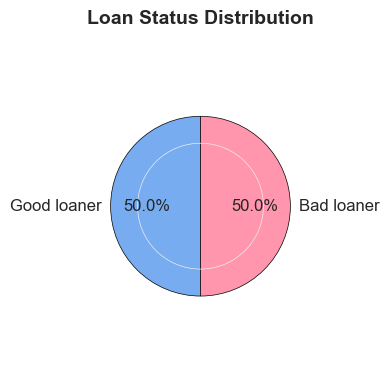

In [324]:

# Count good vs bad loans
loan_counts = y_train_resampled.value_counts()
labels = ['Good loaner', 'Bad loaner']
sizes = loan_counts.values
colors = ['#77ACF1', '#FF96AD']  # Green for good, red for bad

# Create donut chart
fig, ax = plt.subplots(figsize=(4, 4), facecolor='none')
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 12},
    wedgeprops={'edgecolor': 'black'}
)

# Add center circle for donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='none')
fig.gca().add_artist(centre_circle)

# Title
ax.set_title('Loan Status Distribution', fontsize=14, fontweight='bold')

# Equal aspect ratio ensures the pie is circular
ax.axis('equal')

plt.tight_layout()
plt.show()


## Standarization

In [354]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrame using original column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)


In [355]:
X_train_scaled.shape

(664500, 28)

In [356]:
X_test_scaled.shape

(93257, 28)

# Machine Learning

In [347]:
y_test.shape

(93257,)

In [353]:
len(X_test_scaled)

93257

In [349]:
y_pred.shape

(373028,)

In [351]:
y_pred = clf.predict(X_test_scaled)
y_pred.shape

(93257,)

In [352]:
y_pred_train = clf.predict(X_train_scaled)
y_pred_train.shape

(664500,)

In [340]:
y_test.shape

(93257,)

In [359]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

model = XGBClassifier(
    use_label_encoder=False, eval_metric='logloss', random_state=42)


# Fit the model
model.fit(X_train_scaled, y_train_resampled)

# Predict labels and probabilities
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("ROC AUC Score:", roc_auc_score(y_test, y_prob))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.51      0.67     10190
           1       0.94      1.00      0.97     83067

    accuracy                           0.94     93257
   macro avg       0.96      0.76      0.82     93257
weighted avg       0.95      0.94      0.94     93257

Confusion Matrix:
[[ 5238  4952]
 [  182 82885]]
ROC AUC Score: 0.9026033007182811


In [360]:
# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9449
F1 Score: 0.9700


In [361]:
classifiers = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42, max_iter=1000),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42)
}

results = []
feature_importance_results = {}

In [362]:
# Train and evaluate models
for name, clf in classifiers.items():
    print(f"Training {name}...")
    start_time = time.time()

    clf.fit(X_train_scaled, y_train_resampled)

    # Predictions
    y_pred_train = clf.predict(X_train_scaled)
    y_prob_train = clf.predict_proba(X_train_scaled)[:, 1] if hasattr(clf, "predict_proba") else None

    y_pred = clf.predict(X_test_scaled)
    y_prob = clf.predict_proba(X_test_scaled)[:, 1] if hasattr(clf, "predict_proba") else None

    # Training metrics
    train_accuracy = accuracy_score(y_train_resampled, y_pred_train)
    train_recall = recall_score(y_train_resampled, y_pred_train)
    train_precision = precision_score(y_train_resampled, y_pred_train)
    train_f1 = f1_score(y_train_resampled, y_pred_train)
    train_roc_auc = roc_auc_score(y_train_resampled, y_prob_train) if y_prob_train is not None else None

    # Testing metrics
    test_accuracy = accuracy_score(y_test, y_pred)
    test_recall = recall_score(y_test, y_pred)
    test_precision = precision_score(y_test, y_pred)
    test_f1 = f1_score(y_test, y_pred)
    test_roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    elapsed_time = time.time() - start_time

    # Store results
    results.append({
        'Model': name,
        'Train Accuracy': train_accuracy,
        'Train Recall': train_recall,
        'Train Precision': train_precision,
        'Train F1': train_f1,
        'Train ROC AUC': train_roc_auc,
        'Test Accuracy': test_accuracy,
        'Test Recall': test_recall,
        'Test Precision': test_precision,
        'Test F1': test_f1,
        'Test ROC AUC': test_roc_auc,
        'Train Time (s)': round(elapsed_time, 2)
    })

    # Feature importance (for tree-based models)
    if hasattr(clf, 'feature_importances_'):
        feature_importance_results[name] = pd.Series(
            clf.feature_importances_, index=X.columns
        ).sort_values(ascending=False)

# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df


Training RandomForest...
Training LogisticRegression...
Training DecisionTree...
Training XGBoost...
Training GradientBoosting...


,Model,Train Accuracy,Train Recall,Train Precision,Train F1,Train ROC AUC,Test Accuracy,Test Recall,Test Precision,Test F1,Test ROC AUC,Train Time (s)
0,RandomForest,0.999997,1.000000,0.999994,0.999997,1.000000,0.942610,0.995774,0.942987,0.968662,0.872732,1039.56
1,LogisticRegression,0.868429,0.946992,0.818400,0.878013,0.932405,0.902774,0.946164,0.944765,0.945464,0.810024,12.16
2,DecisionTree,1.000000,1.000000,1.000000,1.000000,1.000000,0.886518,0.924290,0.947035,0.935524,0.751448,47.84
3,XGBoost,0.968439,0.998357,0.941993,0.969356,0.990648,0.944948,0.997809,0.943623,0.969960,0.902603,24.91
4,GradientBoosting,0.950182,0.998712,0.910353,0.952488,0.980571,0.942889,0.998892,0.940664,0.968904,0.860738,1240.42


## Evaluation

After evaluating multiple classification models, I have chosen **XGBoost** as the final model. It outperformed the others in terms of accuracy, ROC AUC, and precision, making it the most reliable choice for this case. Additionally, XGBoost achieved an impressive F1 score of 0.97, indicating a strong balance between precision and recall. These results demonstrate its effectiveness in handling the classification problem with both high predictive power and robustness.

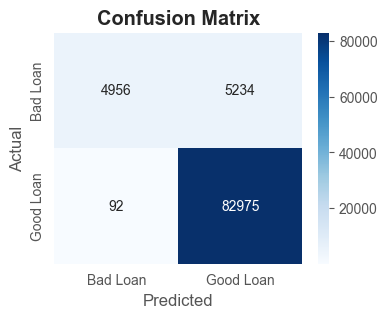

Text(0, 0.5, 'True Positive Rate')

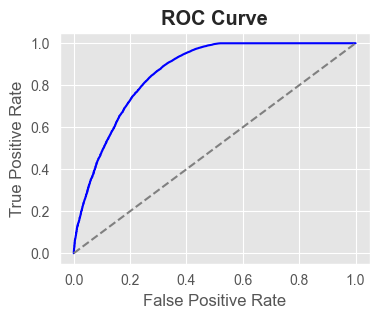

In [363]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Bad Loan", "Good Loan"], yticklabels=["Bad Loan", "Good Loan"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix", fontweight='bold')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc_score(y_test, y_prob):.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve', fontweight='bold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

## Feature Importance

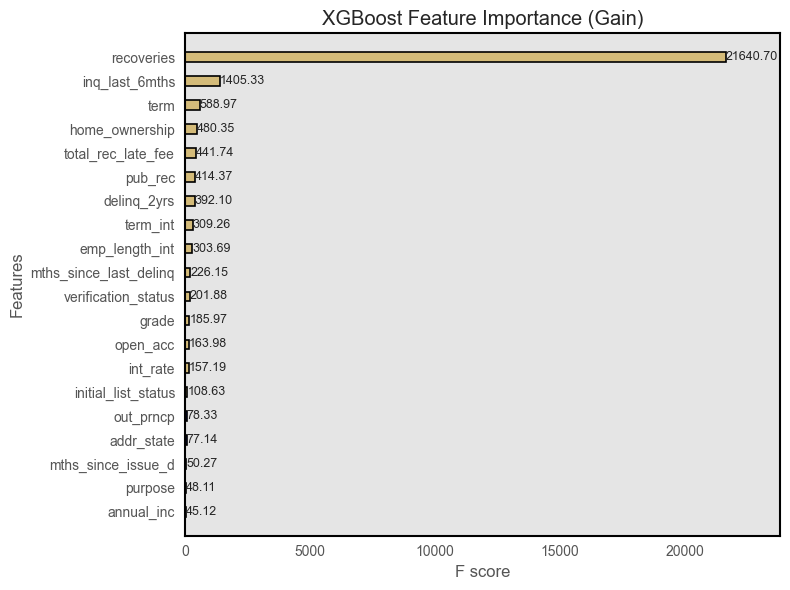

In [372]:
from xgboost import XGBClassifier, plot_importance
import matplotlib.pyplot as plt

# Fit model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train_scaled, y_train_resampled)

# Create figure and axes
fig, ax = plt.subplots(figsize=(8, 6))  # optional: adjust figure size

# Plot importance
plot_importance(
    model,
    importance_type='gain',
    max_num_features=20,
    height=0.4,
    grid=False,
    show_values=False,
    ax=ax
)

# Customize bars (colors, borders, value labels)
for i, bar in enumerate(ax.patches):
    # Set top 5 to '#d4bb79', others to '#0f198a'
    bar.set_facecolor('#0f198a' if i < 5 else '#d4bb79')
    bar.set_edgecolor('black')
    bar.set_linewidth(1.2)

    # Add value label
    value = bar.get_width()
    ax.text(value + 0.01,
            bar.get_y() + bar.get_height() / 2,
            f'{value:.2f}',
            va='center', fontsize=9)

# Add outer border (spines)
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)

# Set title and layout
ax.set_title('XGBoost Feature Importance (Gain)')
plt.tight_layout()
plt.show()


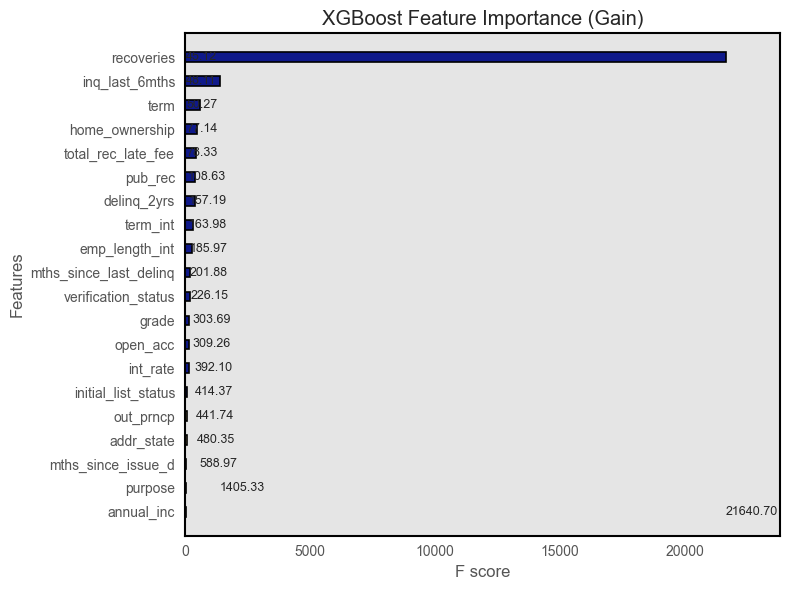

In [373]:
from xgboost import XGBClassifier, plot_importance
import matplotlib.pyplot as plt
import pandas as pd

# Fit model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train_scaled, y_train_resampled)

# Get feature importance (gain) as a Series
importance_dict = model.get_booster().get_score(importance_type='gain')
importance_series = pd.Series(importance_dict).sort_values(ascending=False)

# Get top 20 features
top_features = importance_series.head(20)
top5_features = top_features.head(5).index.tolist()

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
plot_importance(
    model,
    importance_type='gain',
    max_num_features=20,
    height=0.4,
    grid=False,
    show_values=False,
    ax=ax
)

# Map feature name → patch, and customize
for patch, feature in zip(ax.patches, top_features.index):
    patch.set_facecolor('#d4bb79' if feature in top5_features else '#0f198a')
    patch.set_edgecolor('black')
    patch.set_linewidth(1.2)

    # Add value label
    value = top_features[feature]
    ax.text(value + 0.01,
            patch.get_y() + patch.get_height() / 2,
            f'{value:.2f}',
            va='center', fontsize=9)

# Add border around entire plot
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)

# Final layout
ax.set_title('XGBoost Feature Importance (Gain)')
plt.tight_layout()
plt.show()


100%|===================| 93248/93257 [17:34<00:00]        

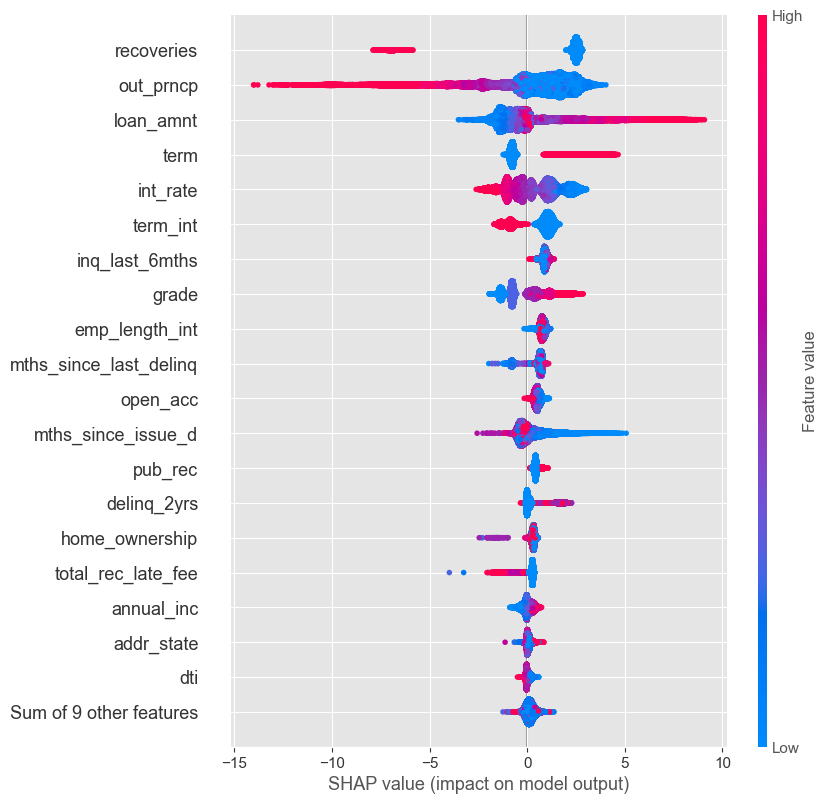

In [369]:
import shap
import matplotlib.pyplot as plt

# Create TreeExplainer
explainer = shap.Explainer(model, X_train_scaled)

# Calculate SHAP values for test set
shap_values = explainer(X_test_scaled)

# Plot summary of SHAP values (feature importance)
shap.plots.beeswarm(shap_values, max_display=20)


In [366]:
data_test = X_test.copy()
data_test['loan_status'] = y_test
data_test['prediction'] = y_pred

In [367]:
ead_borrower_count = data_test[data_test['loan_status'] == 0].shape[0]
ead_borrower_count

10190

In [368]:
ead_borrower_count_after = data_test[data_test['prediction'] == 0].shape[0]
ead_borrower_count_after

5048

<h1><center>Thank You</center></h1>
